In [30]:
#Importing libaries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

### application_train - df1

In [31]:
# Reading Application Train file
df1 = pd.read_csv("application_train.csv")
df1.shape

(307511, 122)

In [32]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Checking the Data types
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [34]:
bool_dtype = ["TARGET","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]

In [35]:
print("Total Number of boolean data type: ",len(bool_dtype))

Total Number of boolean data type:  38


In [36]:
# Converting float into bool
df1[bool_dtype] = df1[bool_dtype].astype(bool)

In [37]:
# Checking the data types again
df1.dtypes

SK_ID_CURR                      int64
TARGET                           bool
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY        bool
AMT_REQ_CREDIT_BUREAU_WEEK       bool
AMT_REQ_CREDIT_BUREAU_MON        bool
AMT_REQ_CREDIT_BUREAU_QRT        bool
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [38]:
# Checking unique values in Code Gender column
df1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [39]:
# Removing XNA values as it is very few 
df1 = df1.drop(df1[df1.CODE_GENDER == 'XNA'].index)

In [40]:
# Checking unique values in Code Gender column
df1.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [41]:
# Checking for null values
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [42]:
# Converting empty values into nan values
df1.replace('', np.nan, inplace=True)

In [43]:
# Dropping null values
df1.dropna(inplace=True)

In [44]:
# Checking for null values atfer dropping null
df1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [45]:
# Checking for duplicate values
df1.duplicated().sum()

0

There is no Duplicate values

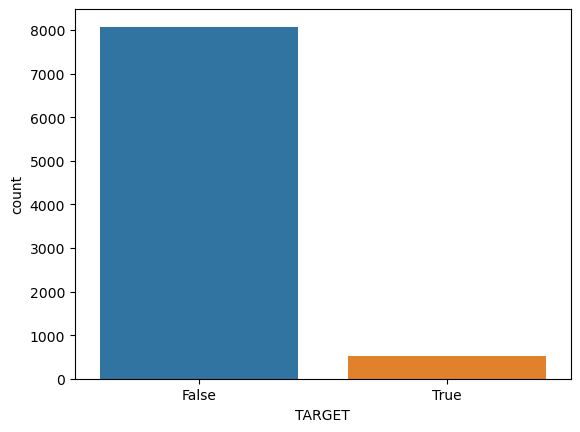

In [46]:
sns.countplot(x = df1.TARGET)
plt.show()

<Axes: title={'center': 'Home Loan'}>

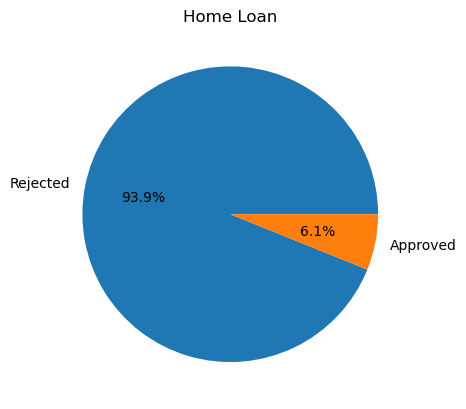

In [47]:
df1.groupby('TARGET').size().plot(kind='pie', labels=['Rejected','Approved'], title = 'Home Loan', explode = [0,0],autopct='%1.1f%%')

From the above graph we could see that 93% ofthe loans are getting not repayed

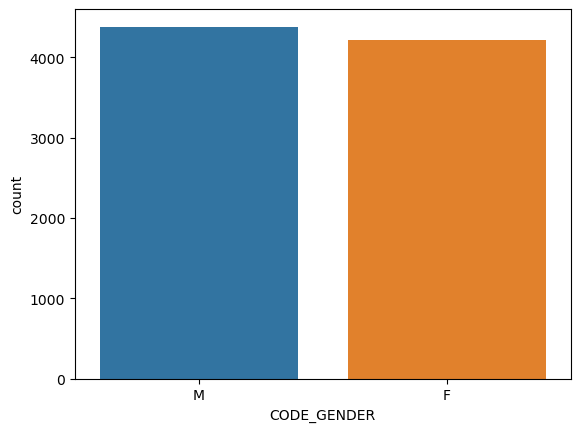

In [48]:
sns.countplot(x = df1.CODE_GENDER)
plt.show()

There is no gender bias for repaying the loan 

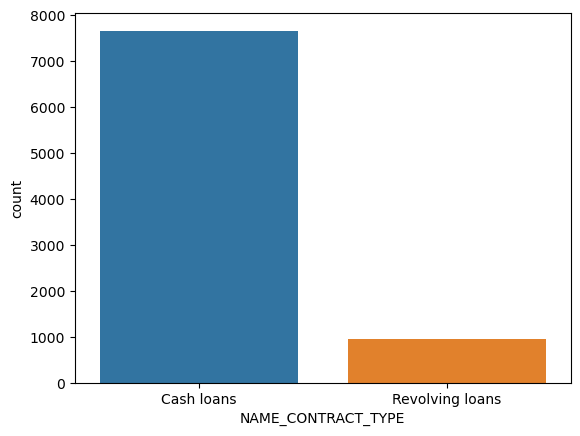

In [49]:
sns.countplot(x = df1.NAME_CONTRACT_TYPE)
plt.show()

Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

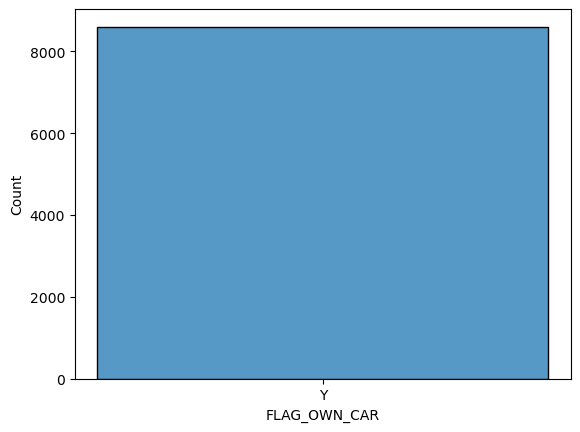

In [50]:
sns.histplot(x = df1.FLAG_OWN_CAR)
plt.show()

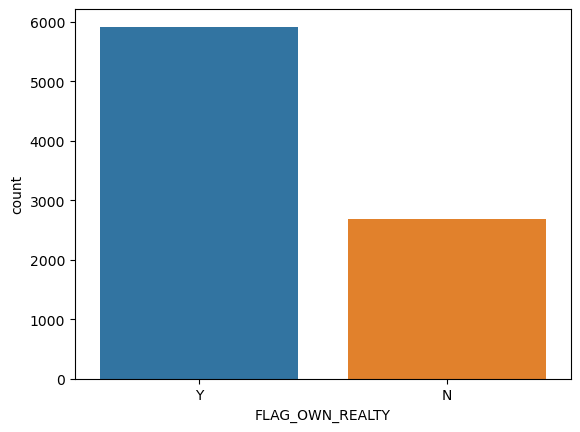

In [51]:
sns.countplot(x = df1.FLAG_OWN_REALTY)
plt.show()

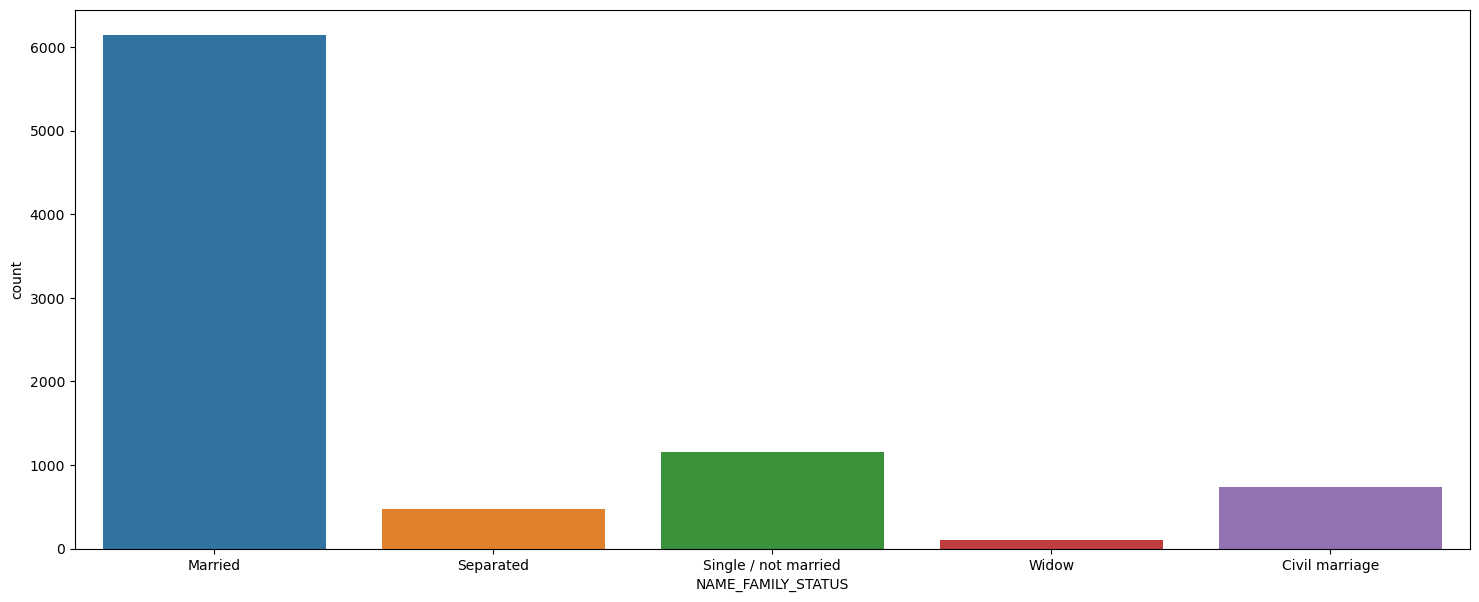

In [52]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df1.NAME_FAMILY_STATUS)
plt.show()

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment

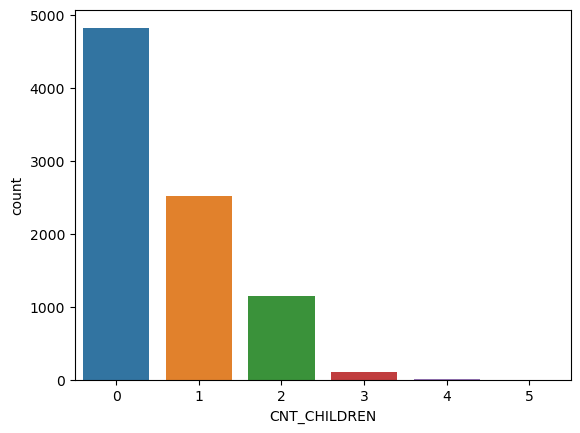

In [53]:
sns.countplot(x = df1.CNT_CHILDREN)
plt.show()

Most of the clients taking a loan have no children

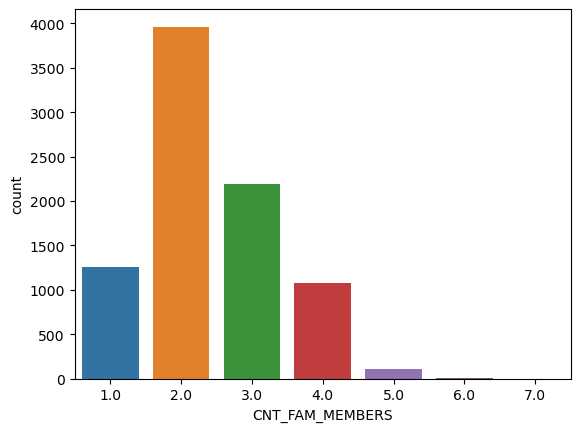

In [54]:
sns.countplot(x = df1.CNT_FAM_MEMBERS)
plt.show()

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4

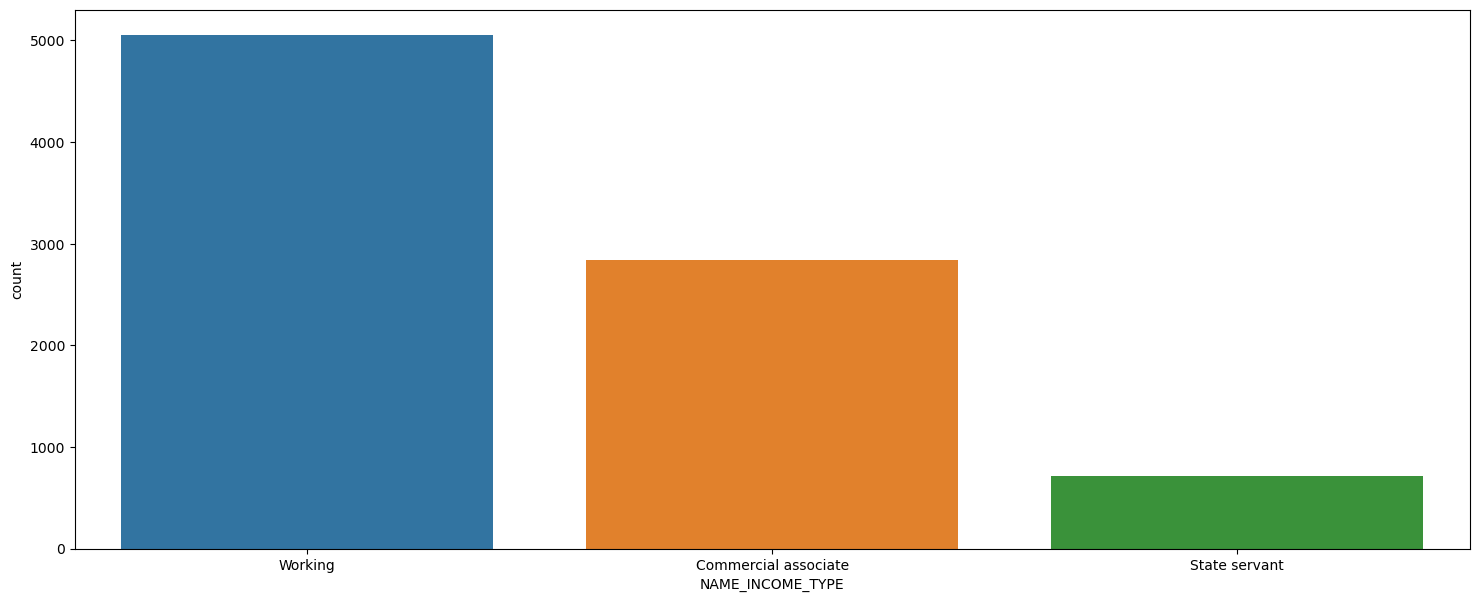

In [55]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df1.NAME_INCOME_TYPE)
plt.show()

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant

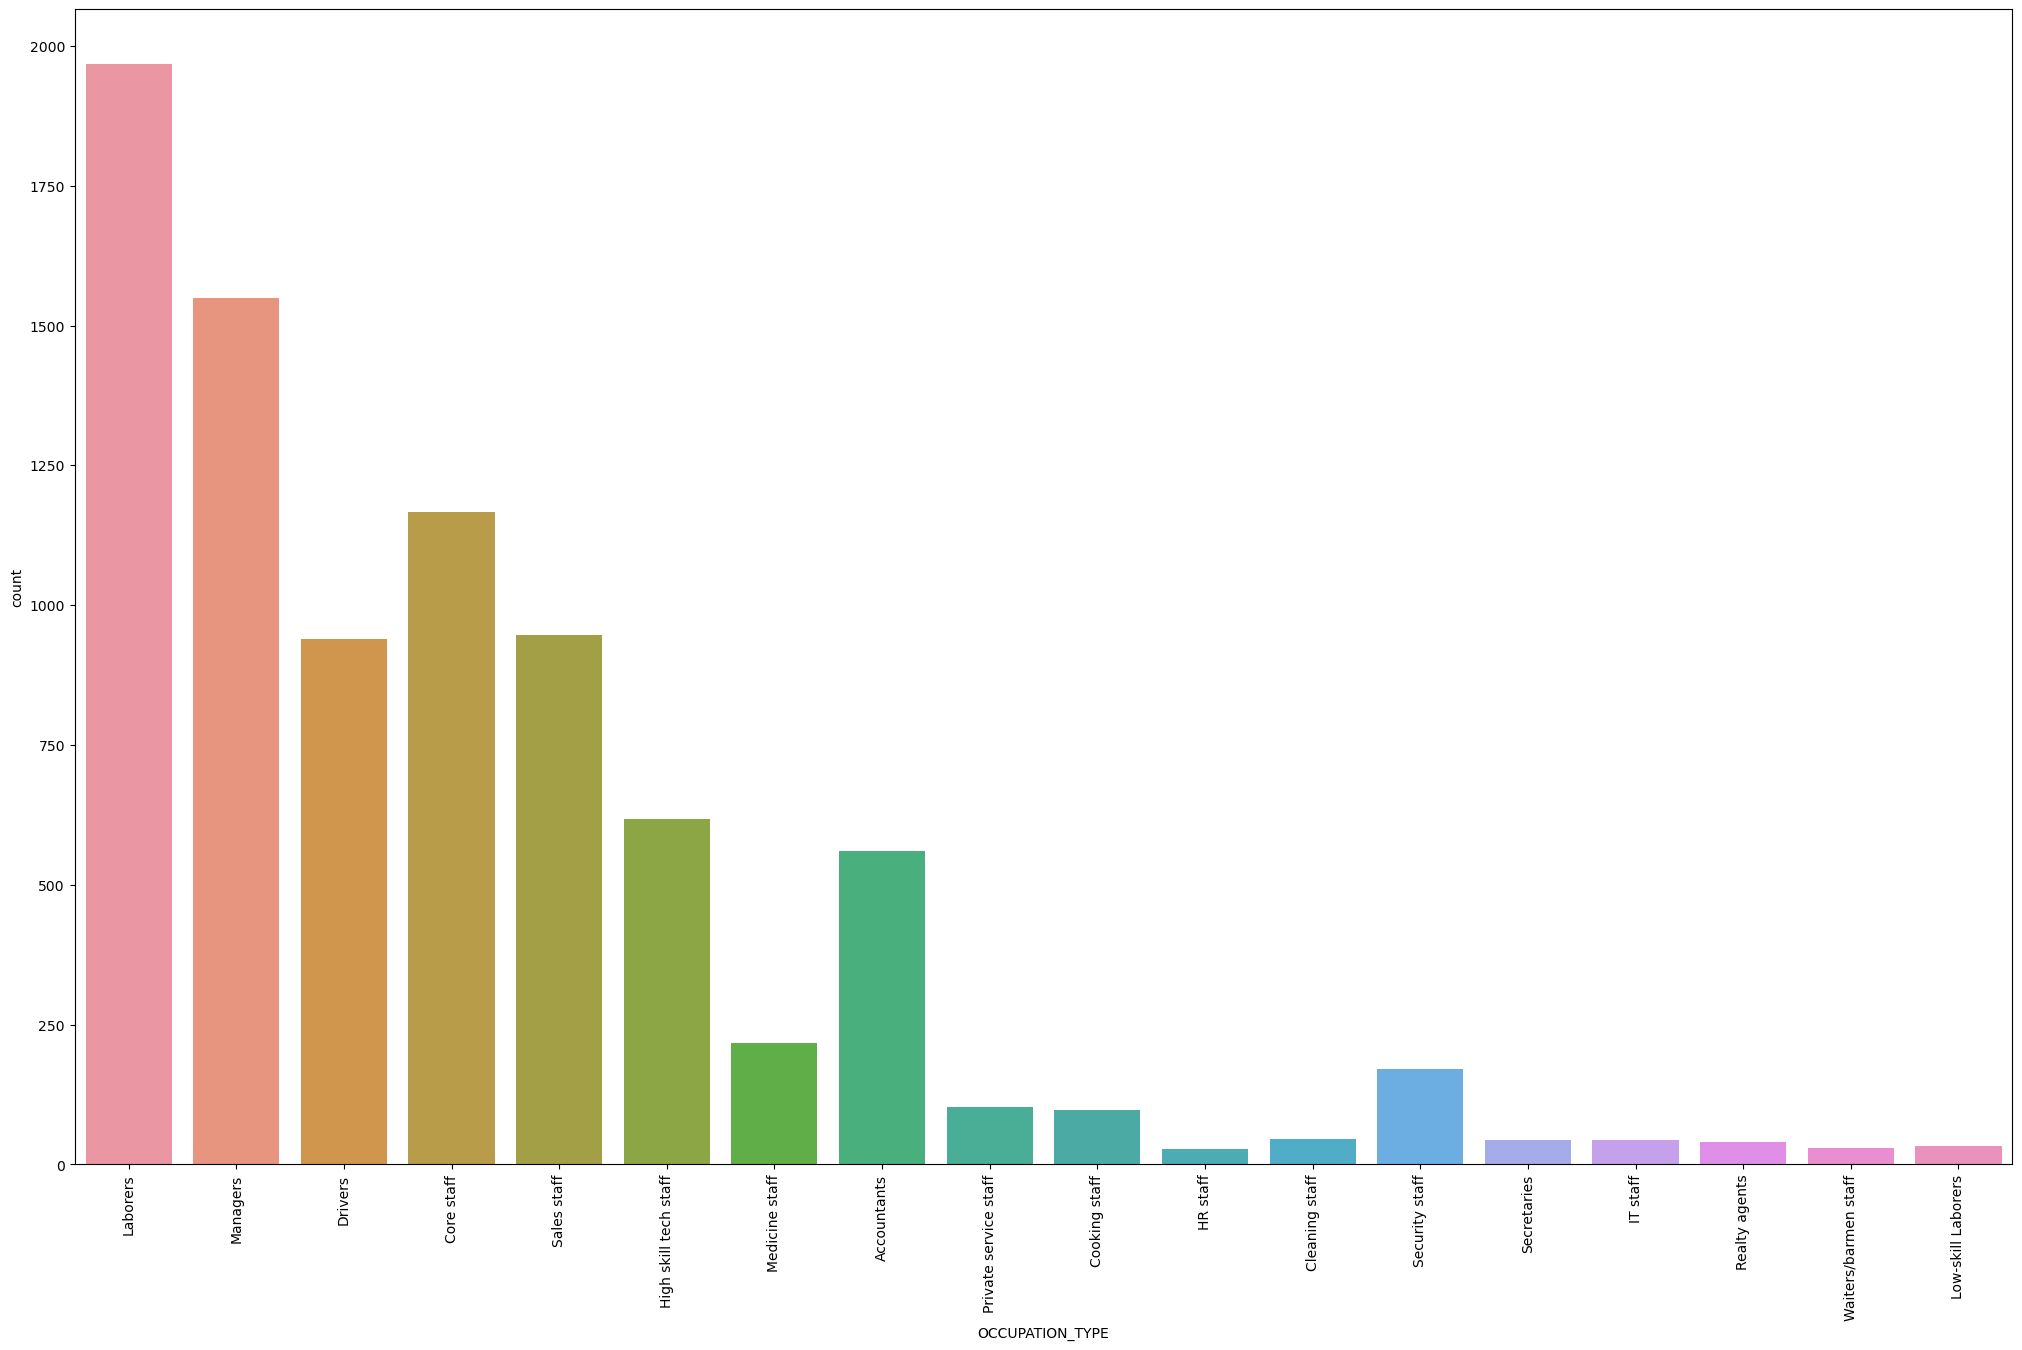

In [56]:
plt.figure(figsize = (25, 15))
sns.countplot(x = df1.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

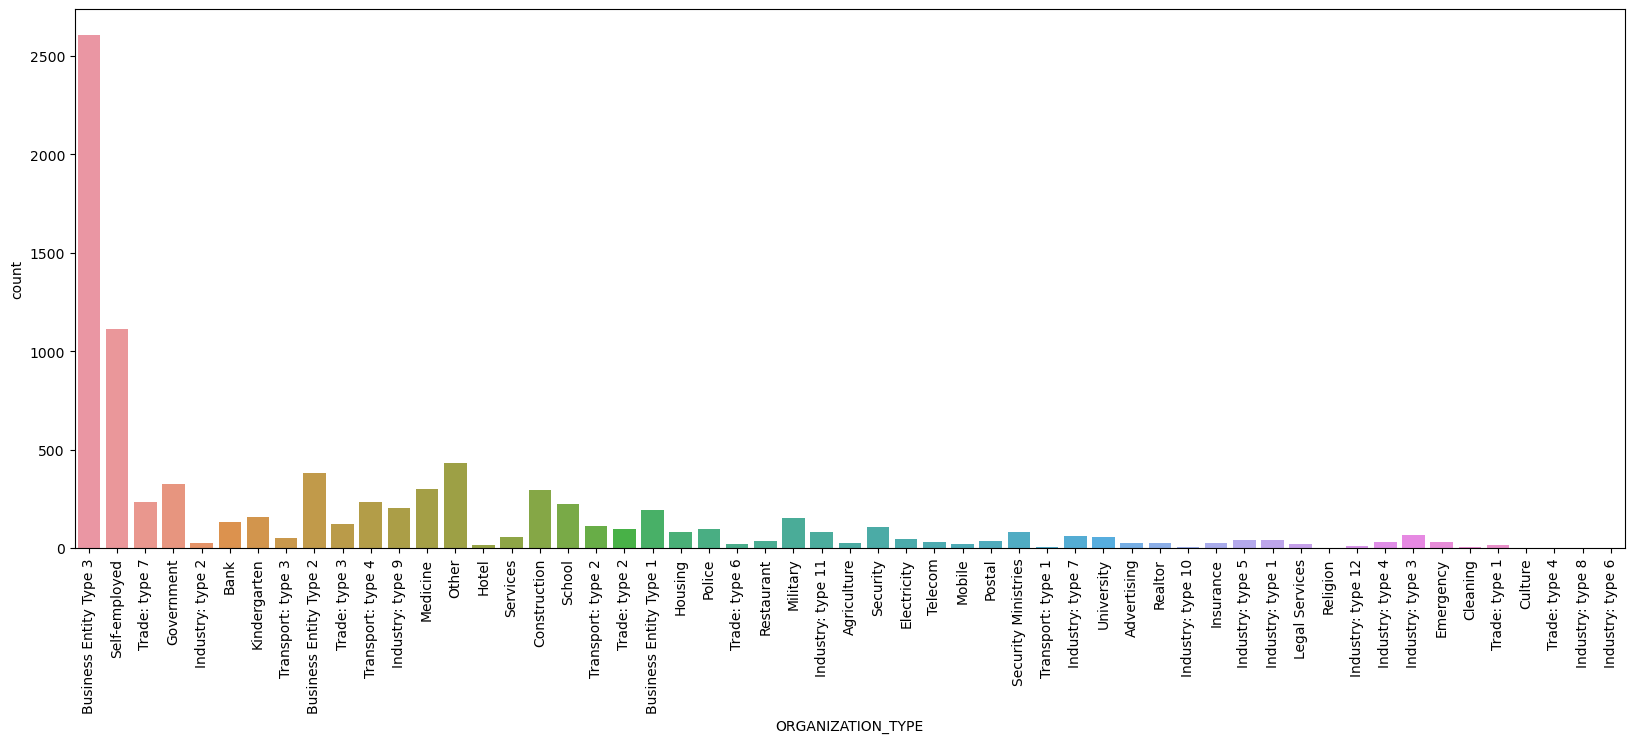

In [57]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.show()

Organizations with highest percent of loans not repaid are Business Entity Type 3 and Self-Employeed

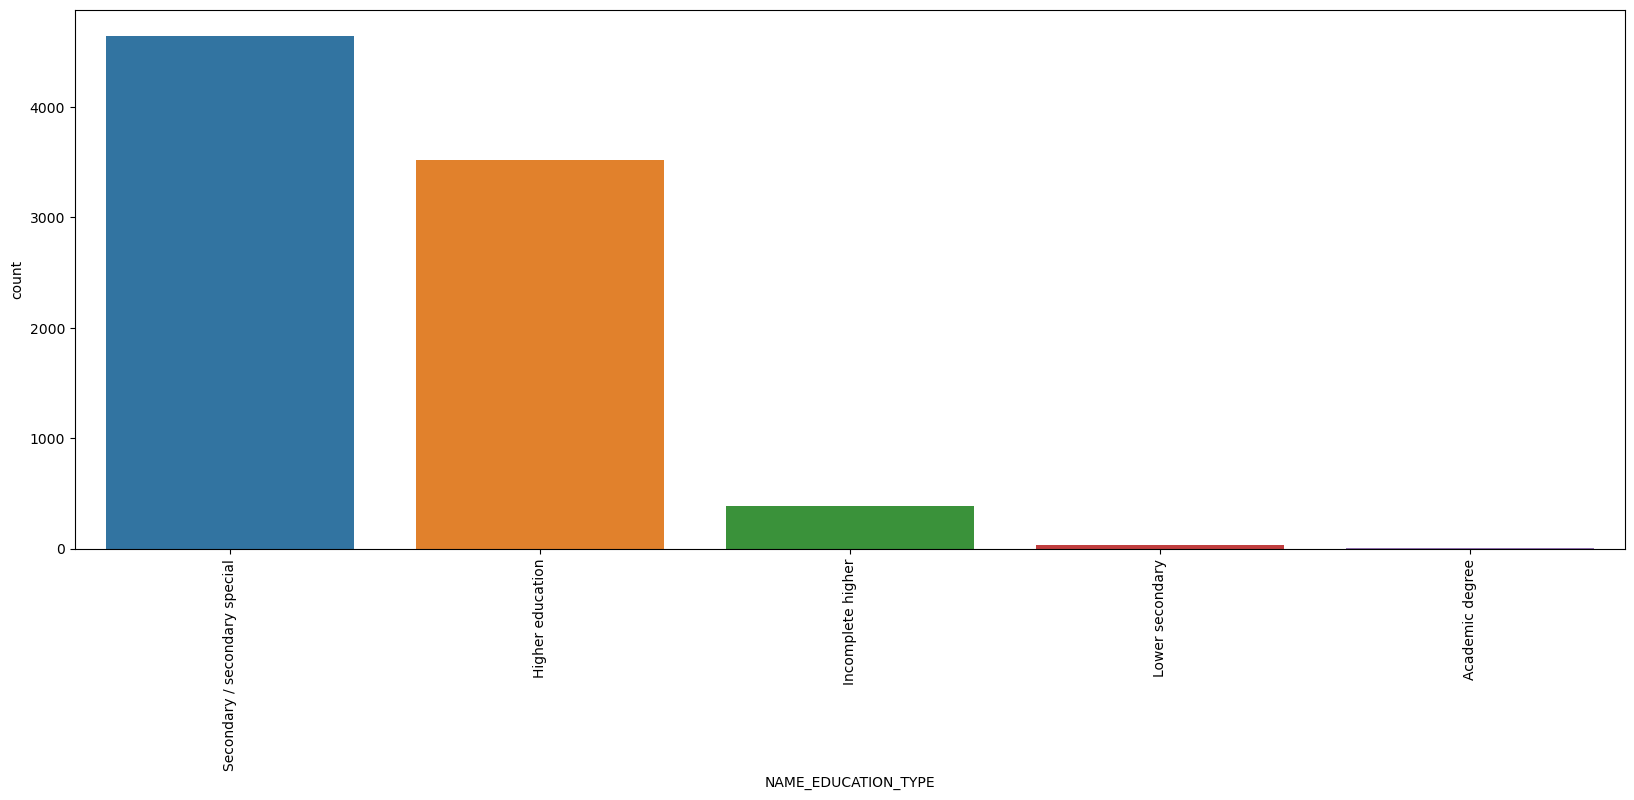

In [58]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.show()

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

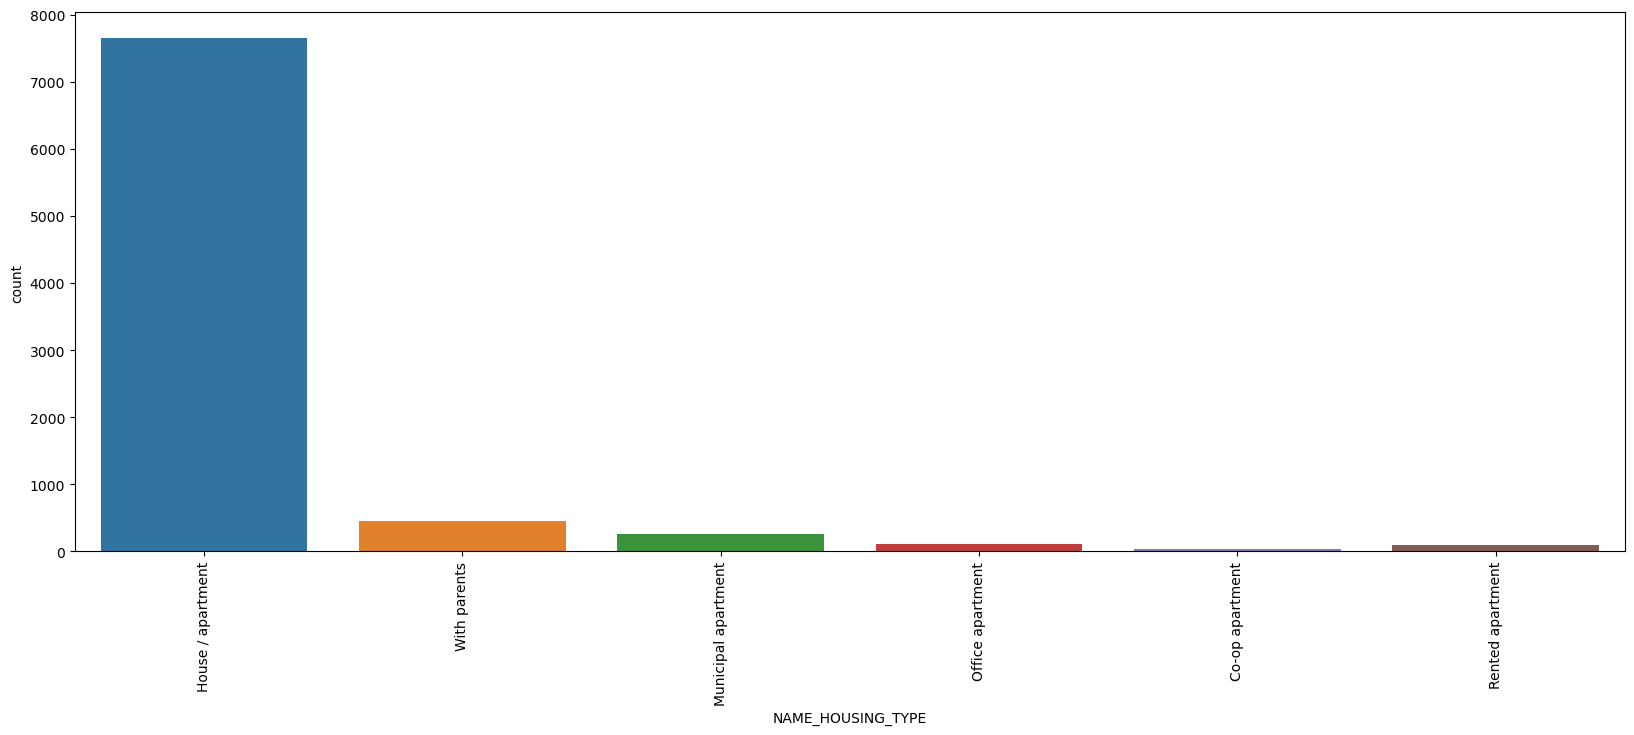

In [59]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.NAME_HOUSING_TYPE)
plt.xticks(rotation=90)
plt.show()

Most of the applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

<Axes: ylabel='Density'>

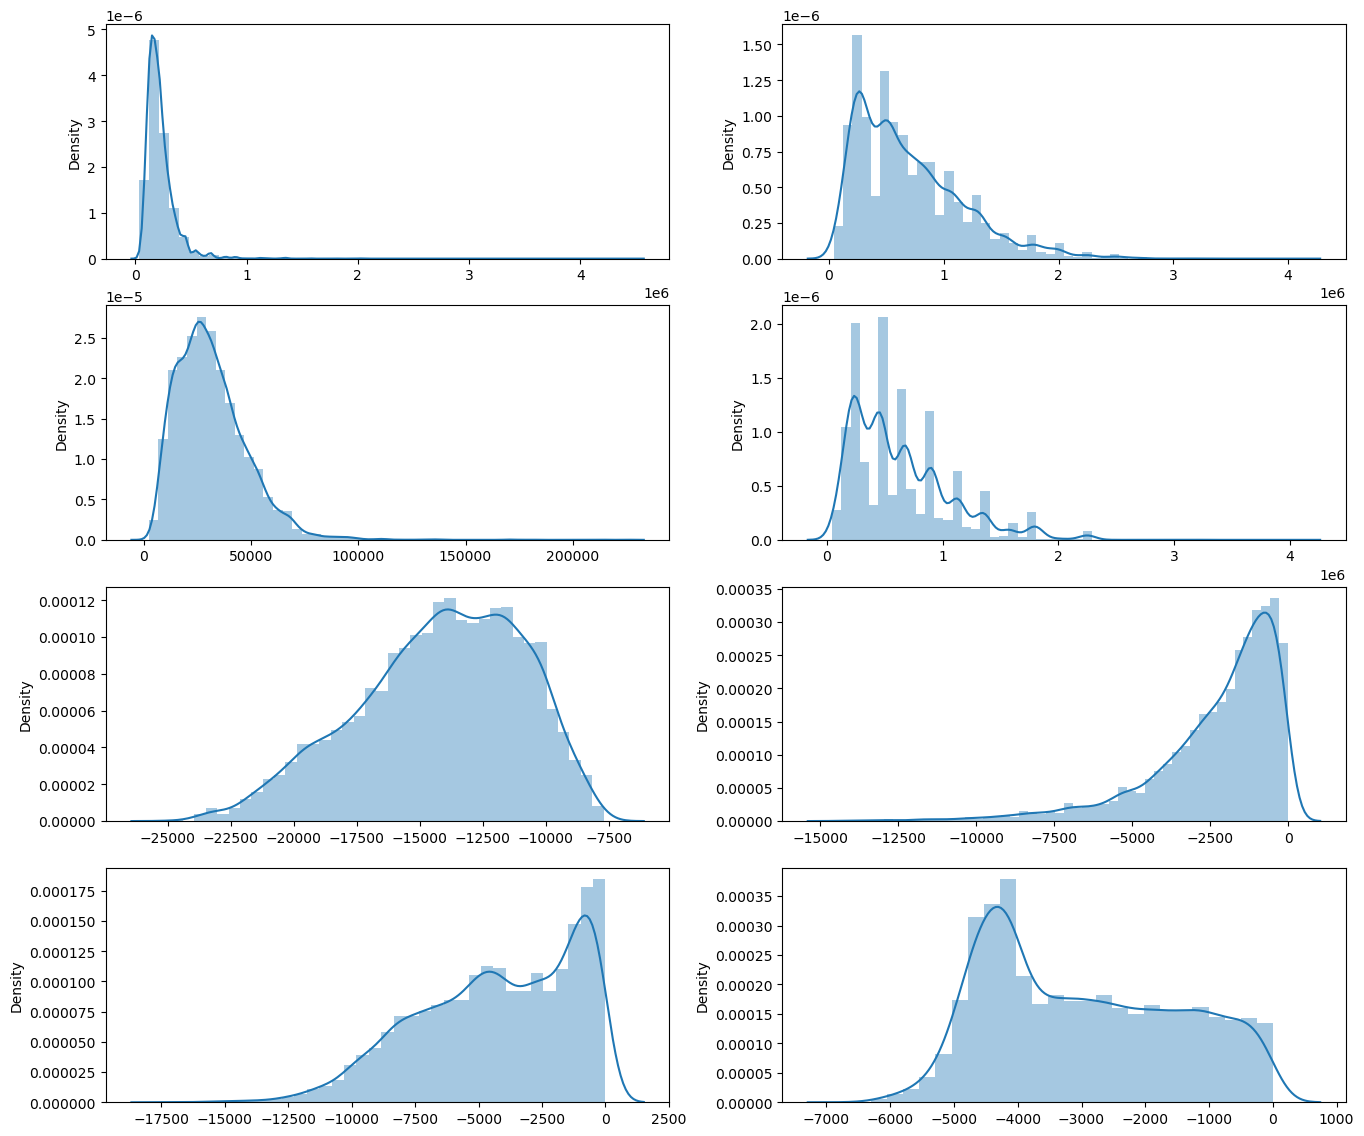

In [60]:
fig , ax  = plt.subplots(nrows=4, ncols=2, figsize  = (16, 14))
sns.distplot(ax=ax[0,0], x=df1.AMT_INCOME_TOTAL)
sns.distplot(ax  = ax[0 , 1] , x=df1.AMT_CREDIT)
sns.distplot(ax  = ax[1 , 0] , x=df1.AMT_ANNUITY)
sns.distplot(ax  = ax[1 , 1] , x=df1.AMT_GOODS_PRICE)
sns.distplot(ax  = ax[2 , 0] , x=df1.DAYS_BIRTH)
sns.distplot(ax  = ax[2 , 1] , x=df1.DAYS_EMPLOYED)
sns.distplot(ax  = ax[3 , 0] , x=df1.DAYS_REGISTRATION)
sns.distplot(ax  = ax[3 , 1] , x=df1.DAYS_ID_PUBLISH)

1) The age range is between approximative 20 and 68 years

2)  It is not clear what will be the meaning of the very large numbers at the far end (it is not realistic such a large set of people employed more than 100 years)

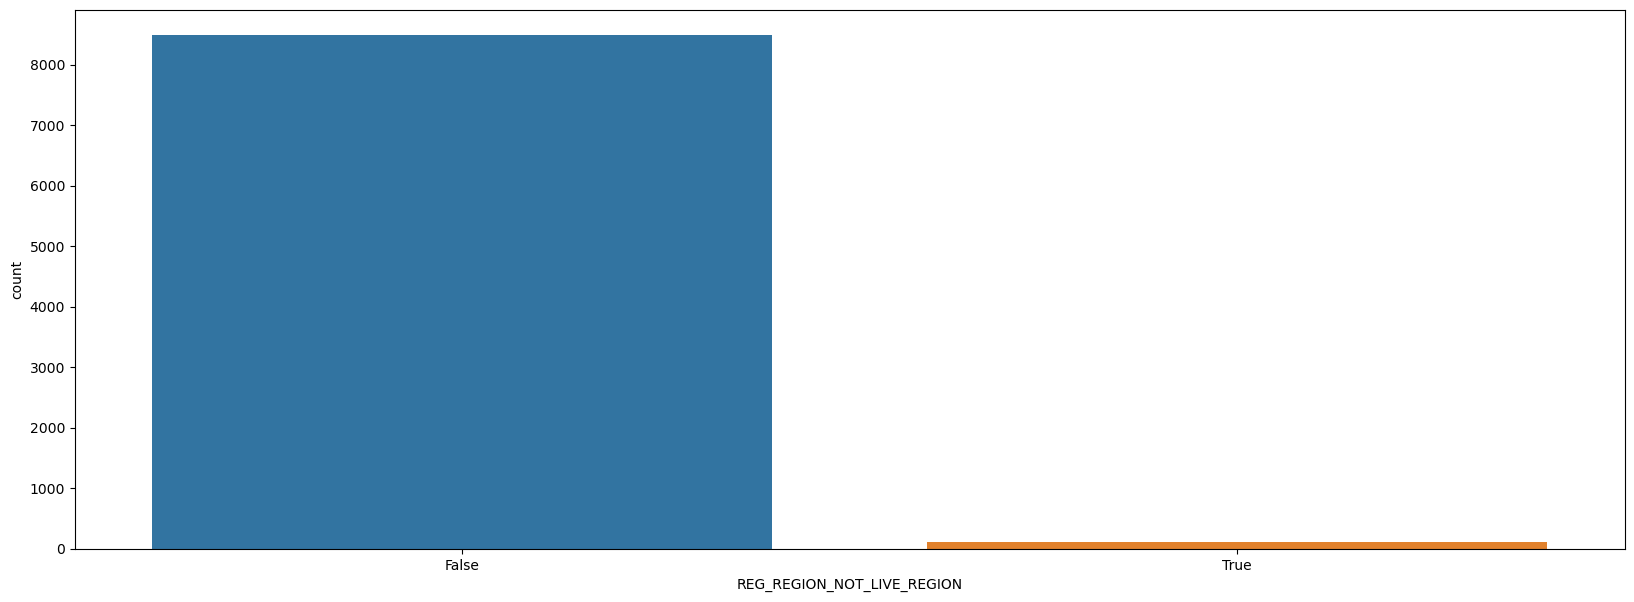

In [61]:
plt.figure(figsize = (20, 7))
sns.countplot(x = df1.REG_REGION_NOT_LIVE_REGION)
plt.show()

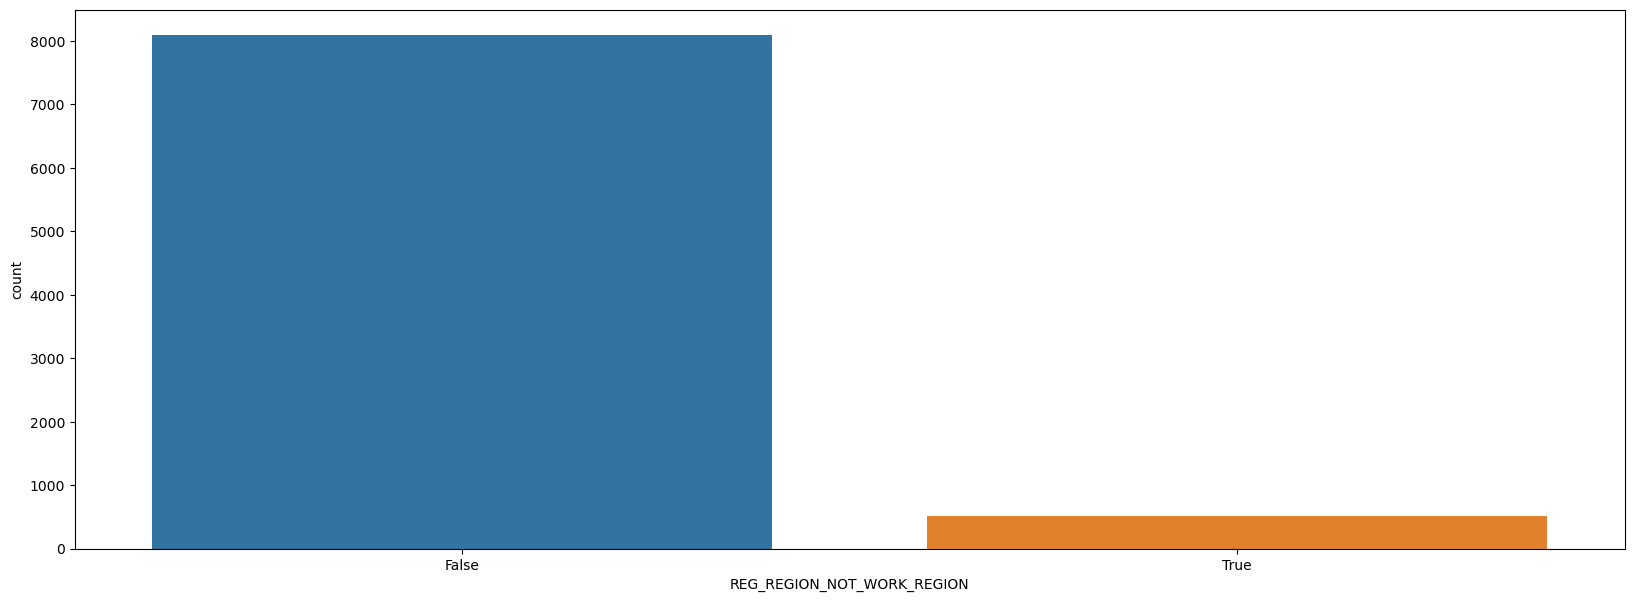

In [62]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.REG_REGION_NOT_WORK_REGION)
plt.show()

Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest

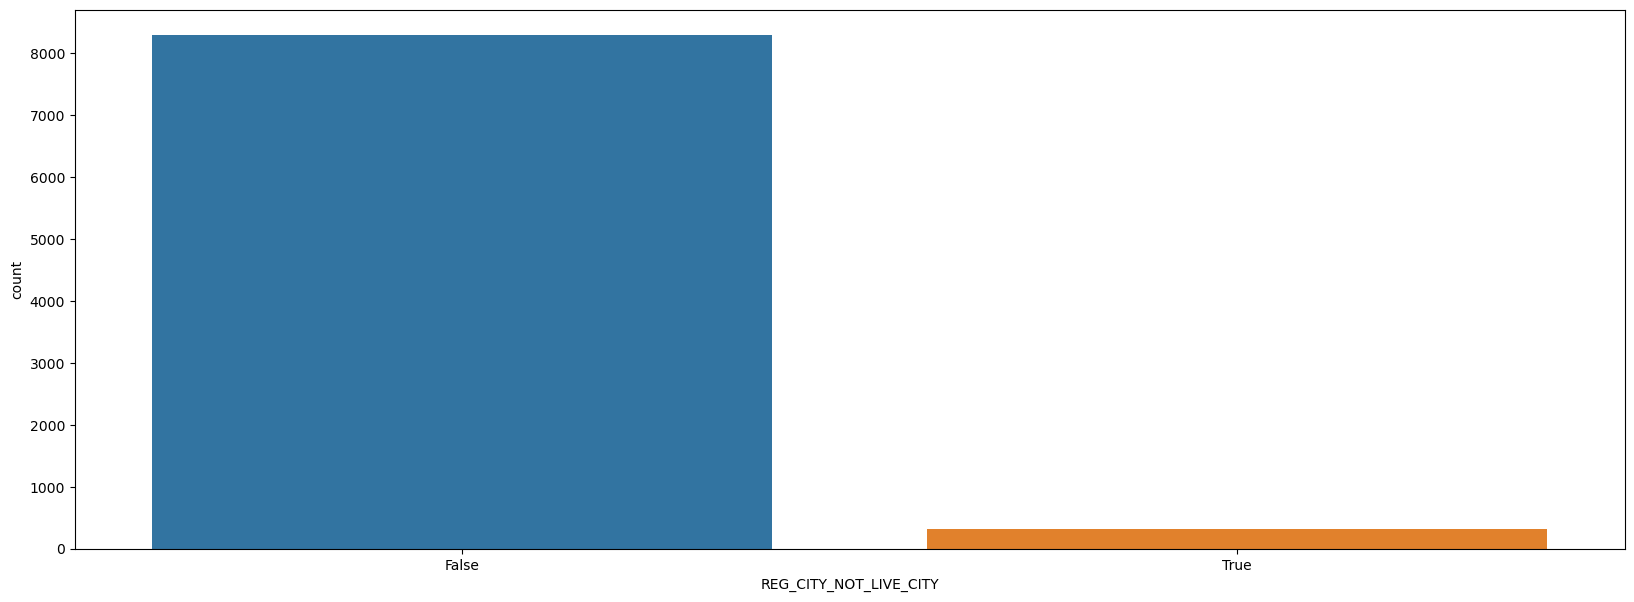

In [63]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.REG_CITY_NOT_LIVE_CITY)
plt.show()

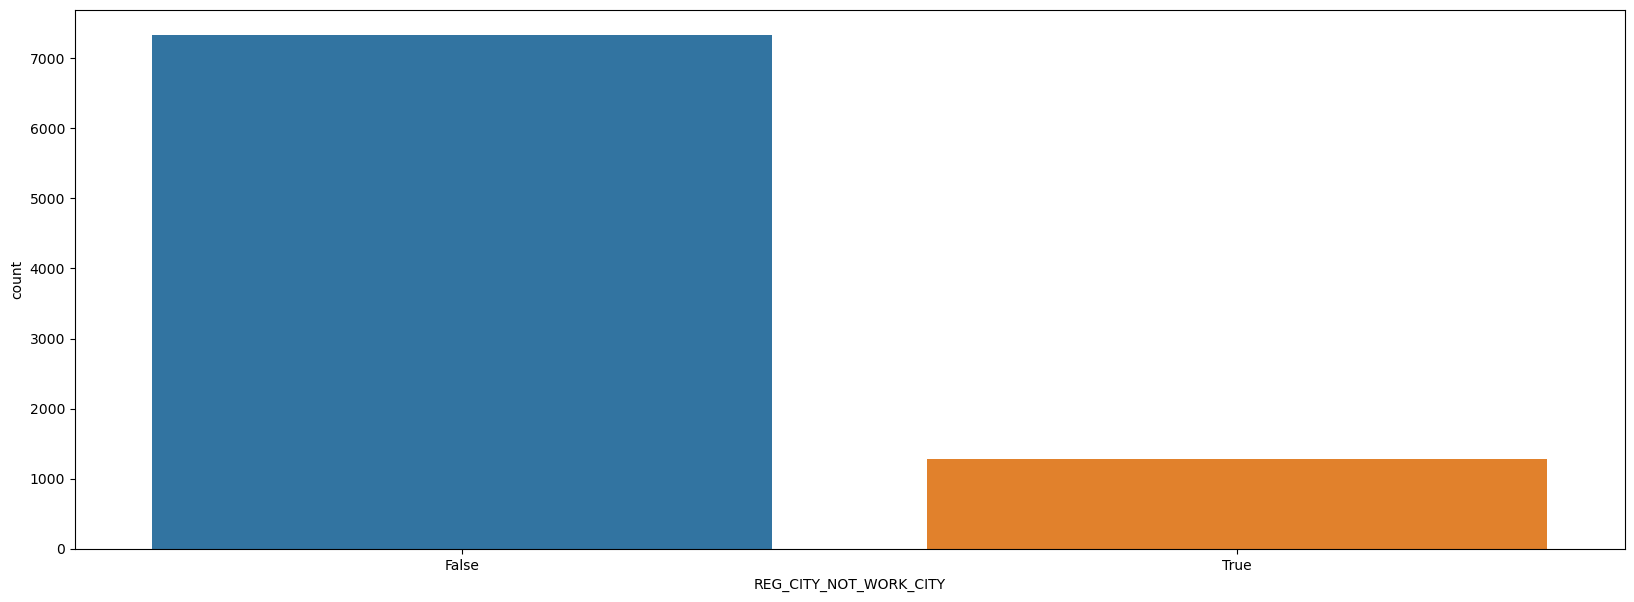

In [64]:
plt.figure(figsize = (20,7))
sns.countplot(x = df1.REG_CITY_NOT_WORK_CITY)
plt.show()

Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).

In [65]:
error = df1[df1['DAYS_EMPLOYED'] == 365243]
print('The no of errors are :', len(error))
(error['TARGET'].value_counts()/len(error))*100

The no of errors are : 0


Series([], Name: TARGET, dtype: float64)

### bureau - df2

In [66]:
# Reading the file bureau
df2 = pd.read_csv("bureau.csv")
df2.shape

(1716428, 17)

In [67]:
df2.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [68]:
# Replacing empty values as nan
df2.replace('', np.nan, inplace=True)

In [69]:
# Checking for null values
df2.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [70]:
# Removing null values
df2.dropna(inplace=True)

In [71]:
# Checking for null values after removing null
df2.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [72]:
# Checking for duplicate values
df2.duplicated().sum()

0

There is no duplicate values

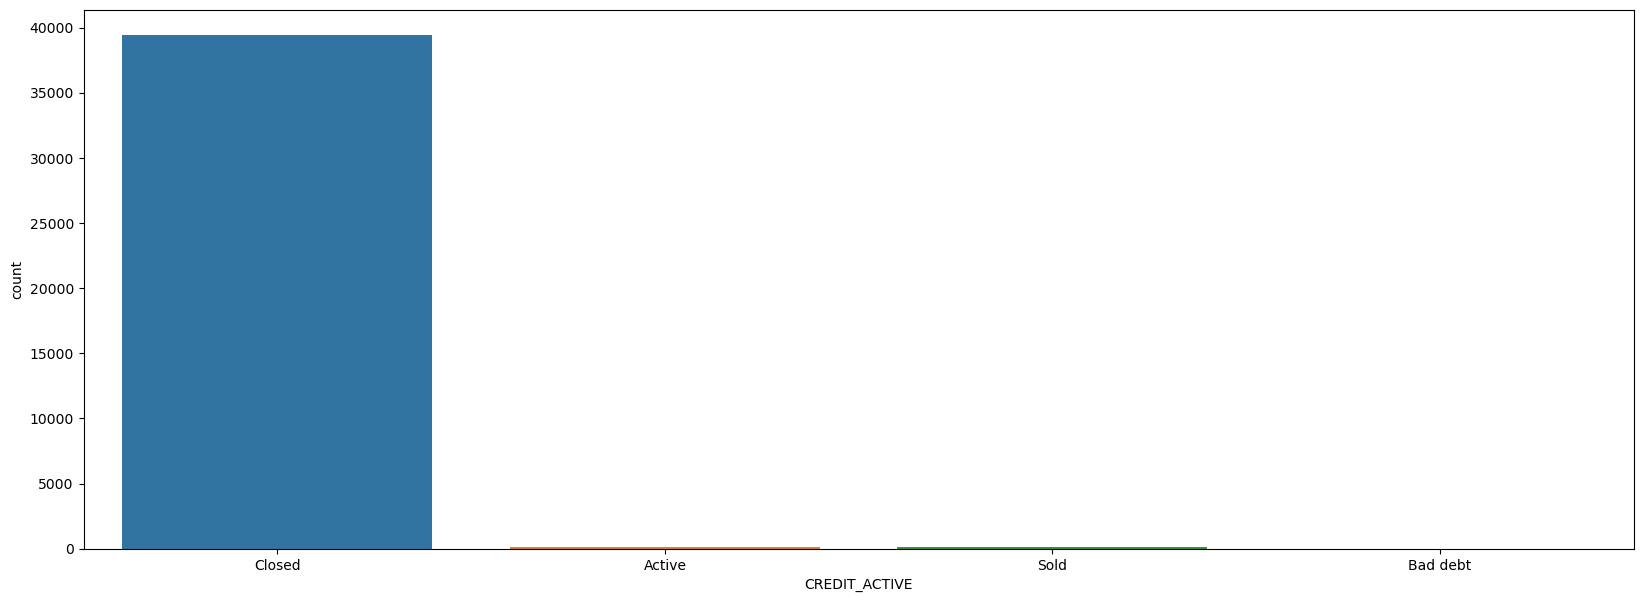

In [73]:
plt.figure(figsize = (20,7))
sns.countplot(x = df2.CREDIT_ACTIVE)
plt.show()

Most of the credits registered at the Credit Bureau are in the status Closed

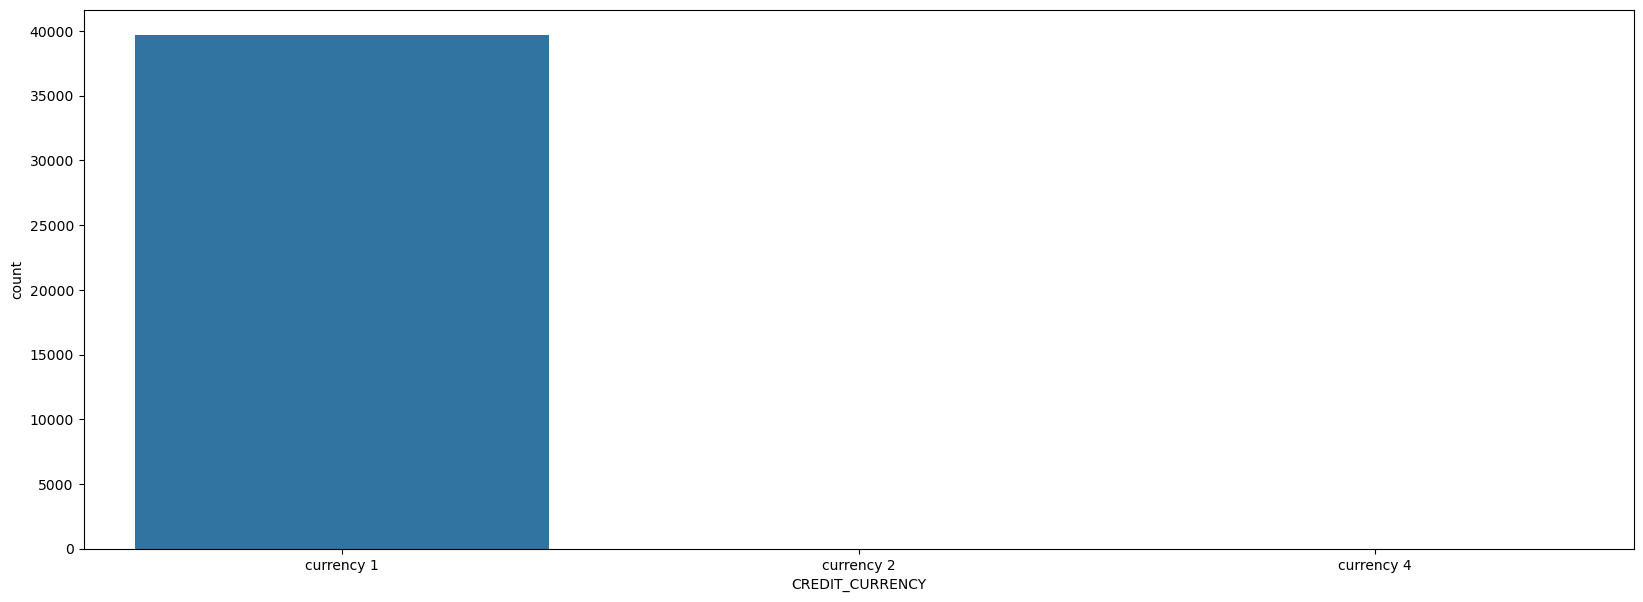

In [74]:
plt.figure(figsize = (20,7))
sns.countplot(x = df2.CREDIT_CURRENCY)
plt.show()

Percent of defaulting applications for clients that have credits registered with currency_4 are currency_2 are close to 0

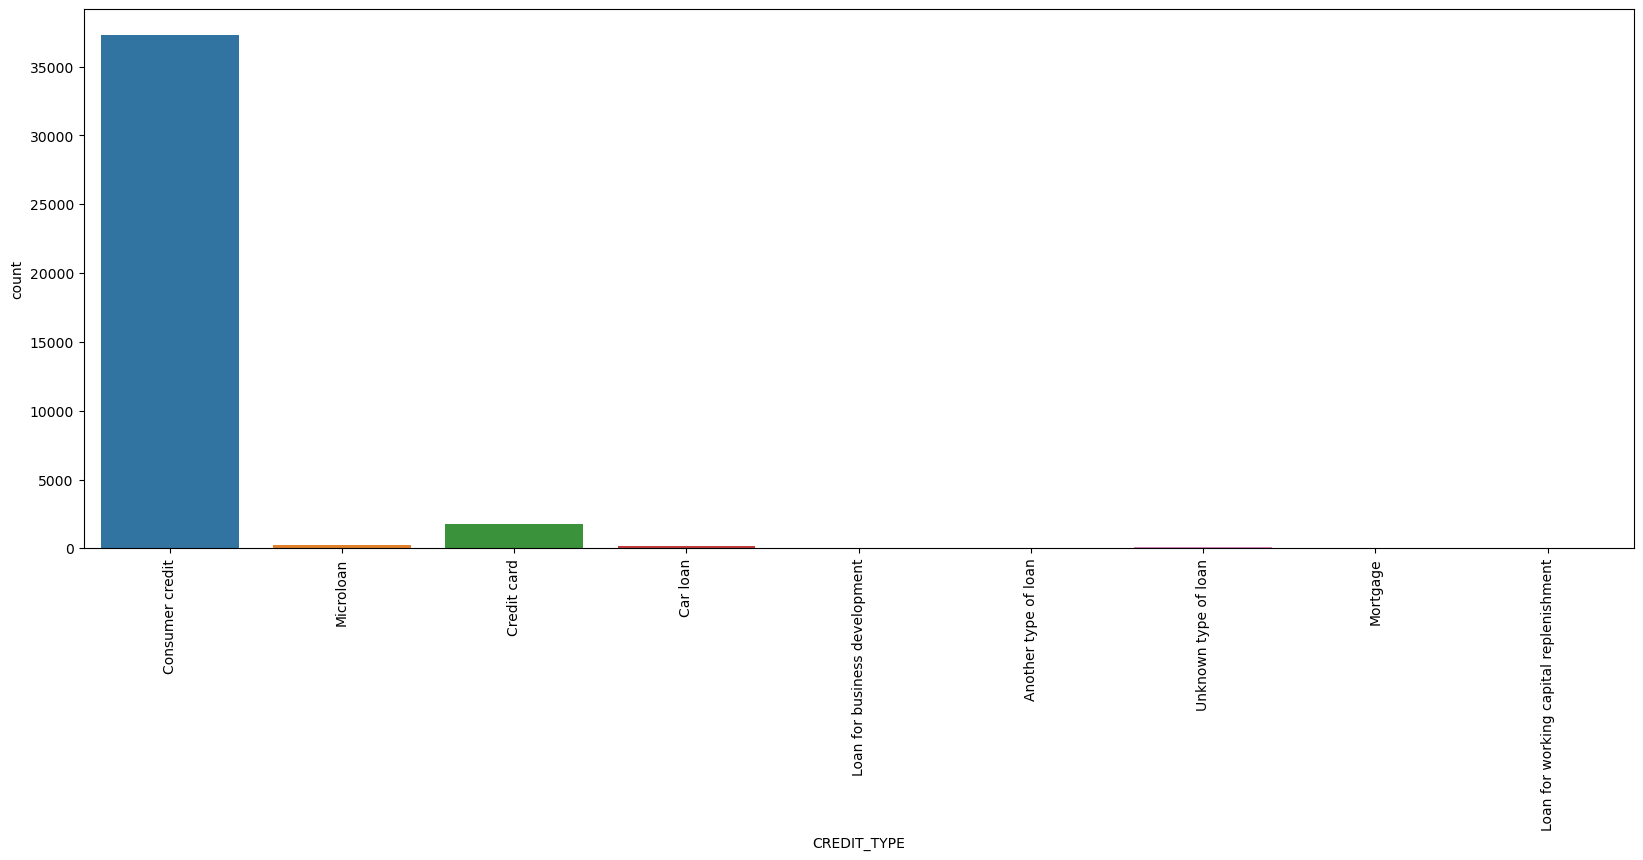

In [75]:
plt.figure(figsize = (20,7))
sns.countplot(x = df2.CREDIT_TYPE)
plt.xticks(rotation=90)
plt.show()

Majority of historical credits registered at the Credit Bureau are Consumer credit and Credit card. Smaller number of credits are Car loan, Mortgage and Microloan.

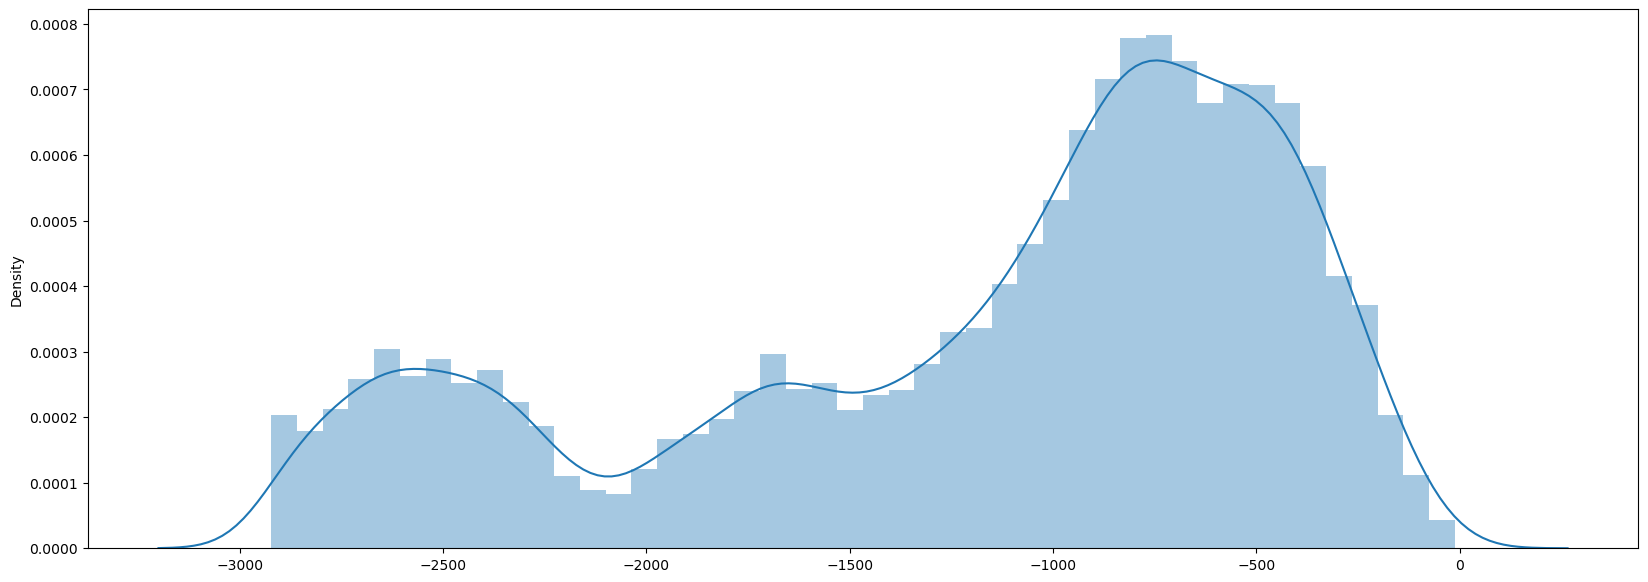

In [76]:
plt.figure(figsize = (20,7))
sns.distplot(x = df2.DAYS_CREDIT)
plt.show()

The credit duration (in days) is ranging between less than 3000 days (with a local sadle around 2000 days) and with a increasing frequence for shorter number of days - and with a peak around 300 days (or less than one year)

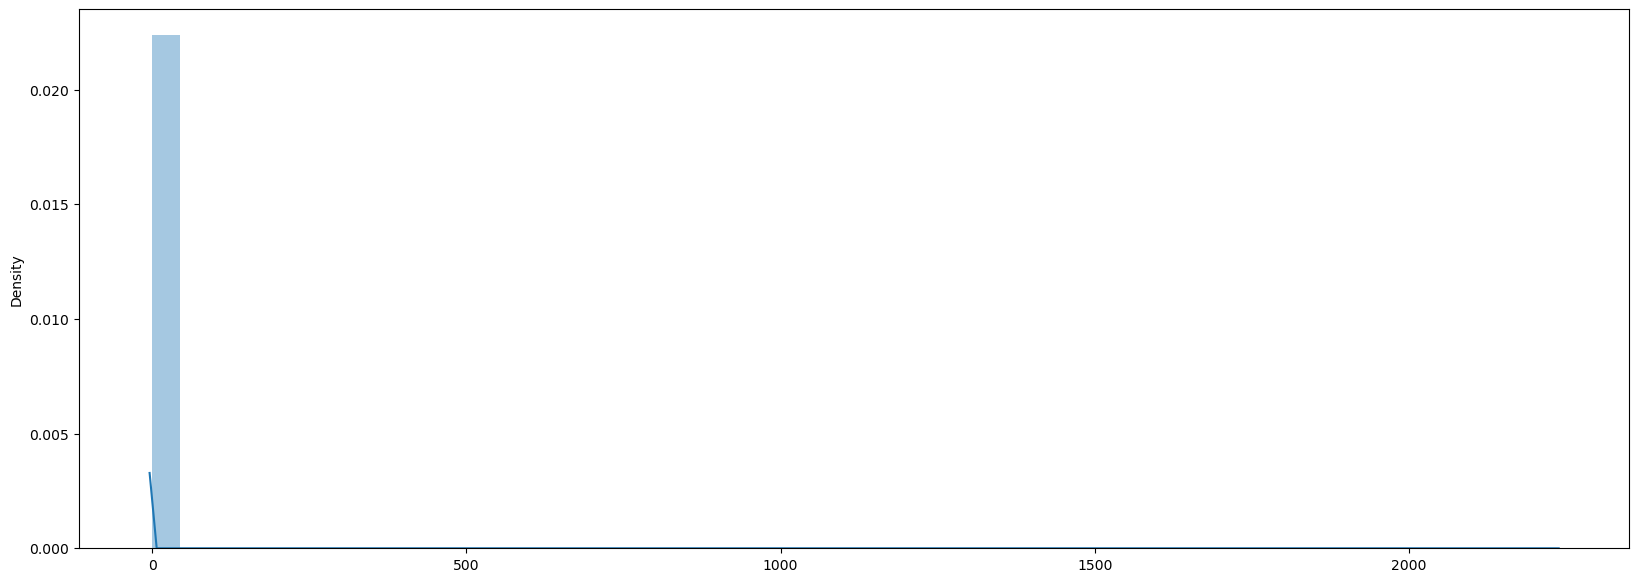

In [77]:
plt.figure(figsize = (20,7))
sns.distplot(x = df2.CREDIT_DAY_OVERDUE)
plt.show()

Most of the credits have 0 or close to 0 days overdue. The maximum number of credit days overdue is ~3000 days.

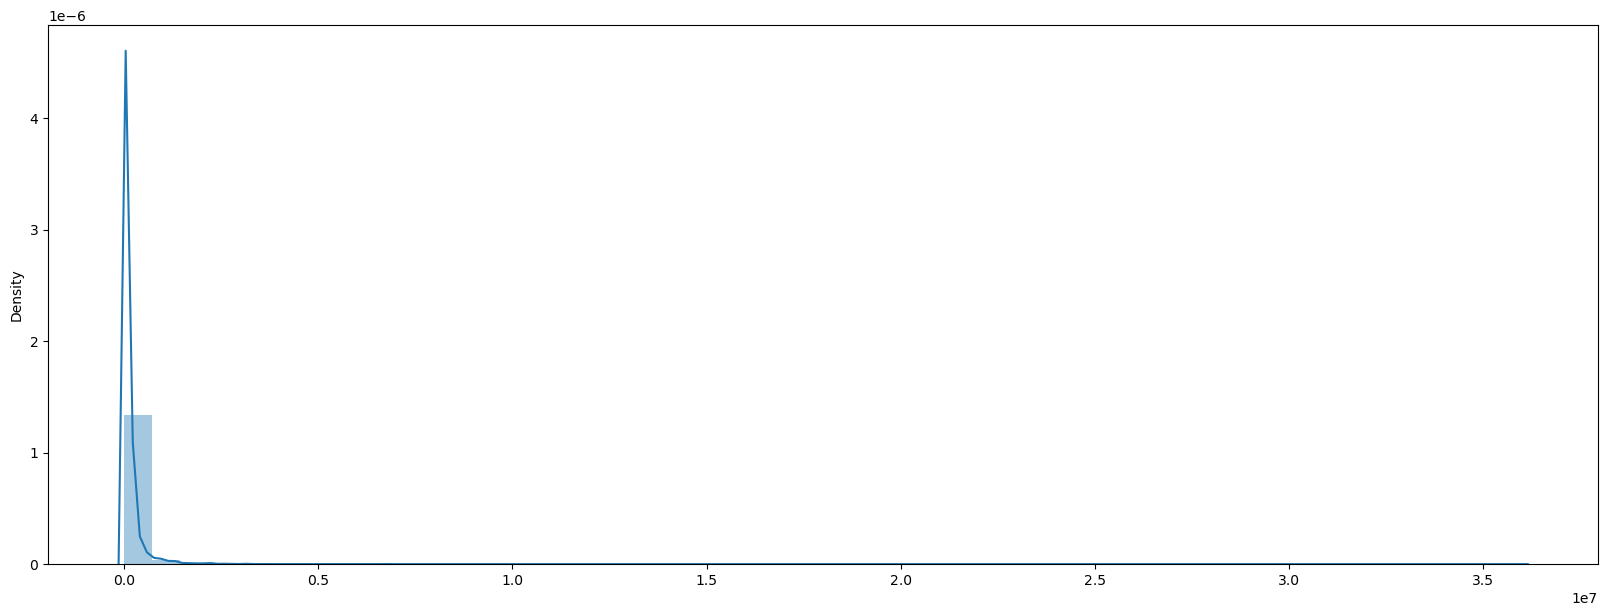

In [78]:
plt.figure(figsize = (20,7))
sns.distplot(x = df2.AMT_CREDIT_SUM)
plt.show()

The distribution of the AMT_CREDIT_SUM shows a concentration of the credits for the lower credit sum range

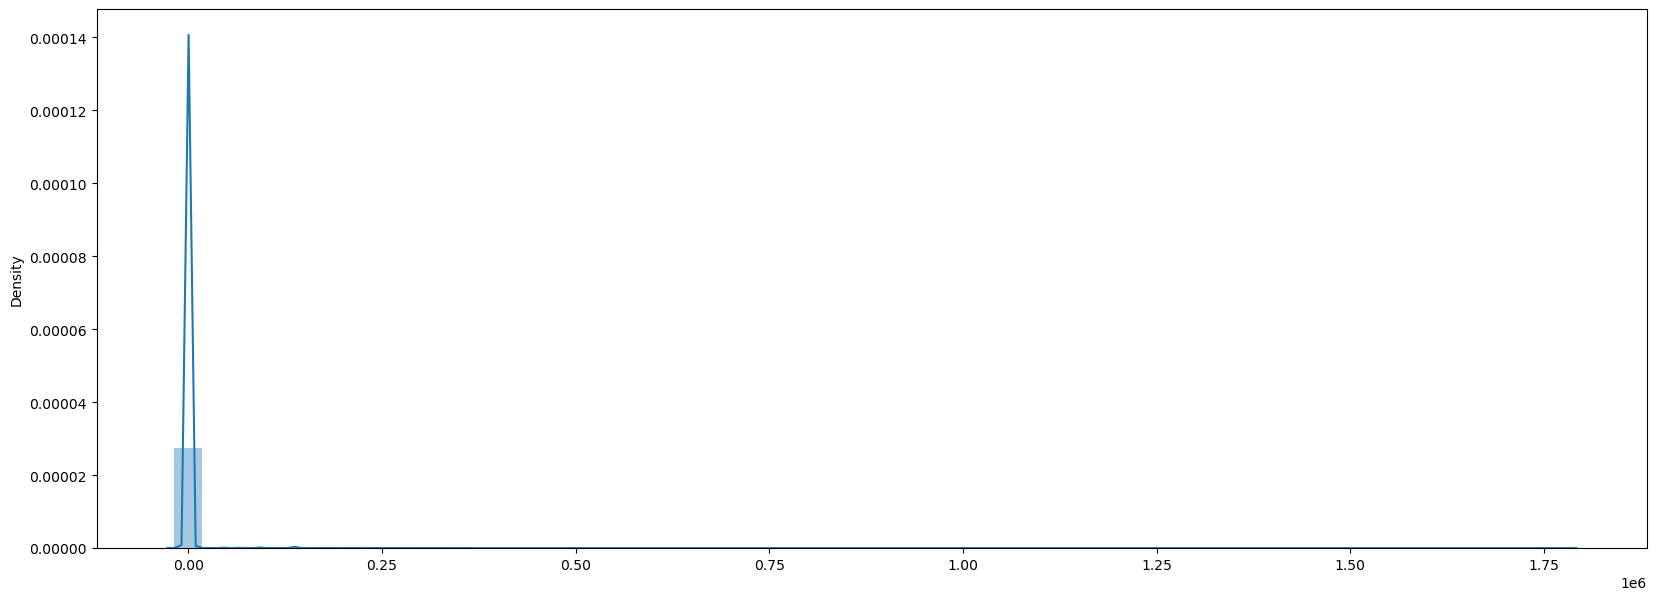

In [79]:
plt.figure(figsize = (20,7))
sns.distplot(x = df2.AMT_CREDIT_SUM_LIMIT)
plt.show()

In [80]:
# Combining numerical features
grp = df2.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = df1.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))
# Combining categorical features
bureau_categorical = pd.get_dummies(df2.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = df2['SK_ID_CURR']
grp = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))
# Shape of application and bureau data combined
print('The shape application and bureau data combined:',application_bureau.shape)

The shape application and bureau data combined: (8602, 150)


### bureau_balance - df3

In [81]:
# Reading the file bureau balance
df3 = pd.read_csv("bureau_balance.csv")
df3.shape

(27299925, 3)

In [82]:
df3.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [83]:
# Replacing empty values into nan
df3.replace('', np.nan, inplace=True)

In [84]:
# Checking for null values
df3.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [85]:
# Dropping null values
df3.dropna(inplace=True)

In [86]:
# Checking for null values atfer dropping null
df3.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [87]:
# Checking for duplicate values
df3.duplicated().sum()

0

There is no duplicate values

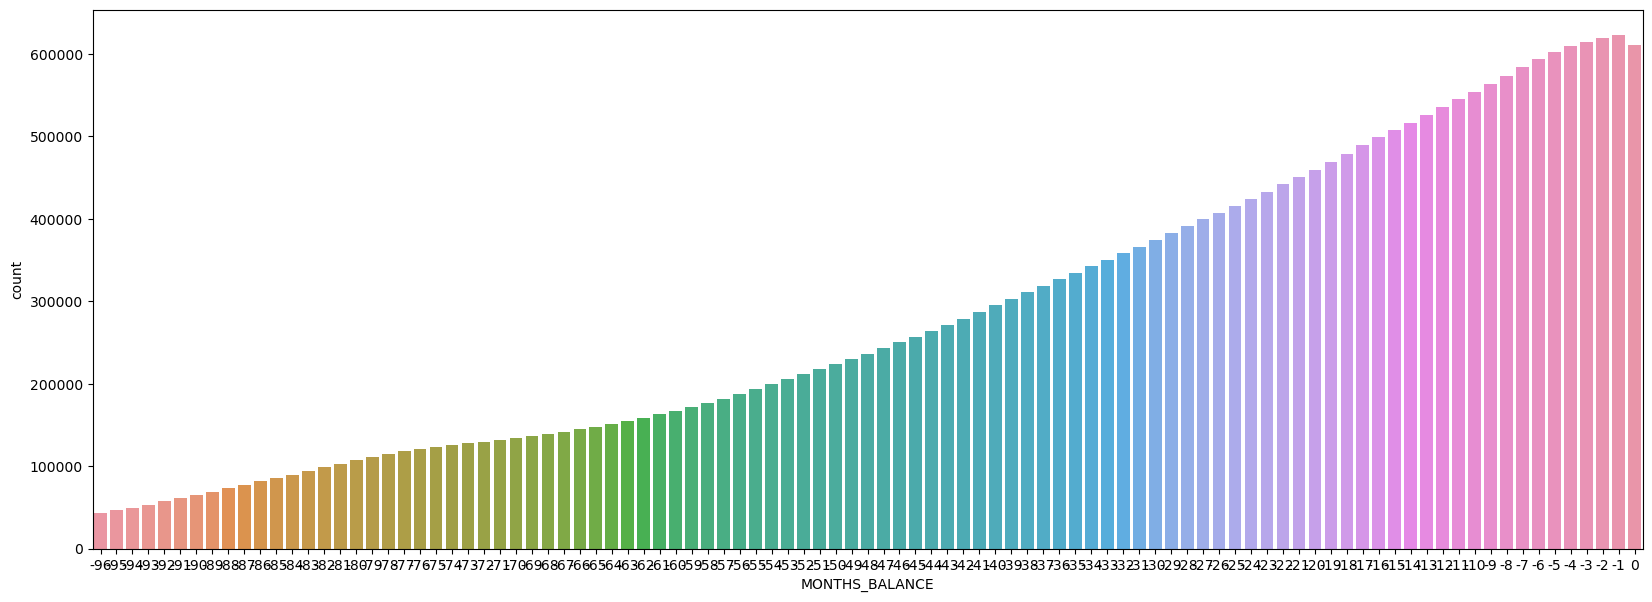

In [88]:
plt.figure(figsize = (20,7))
sns.countplot(x = df3.MONTHS_BALANCE)
plt.show()

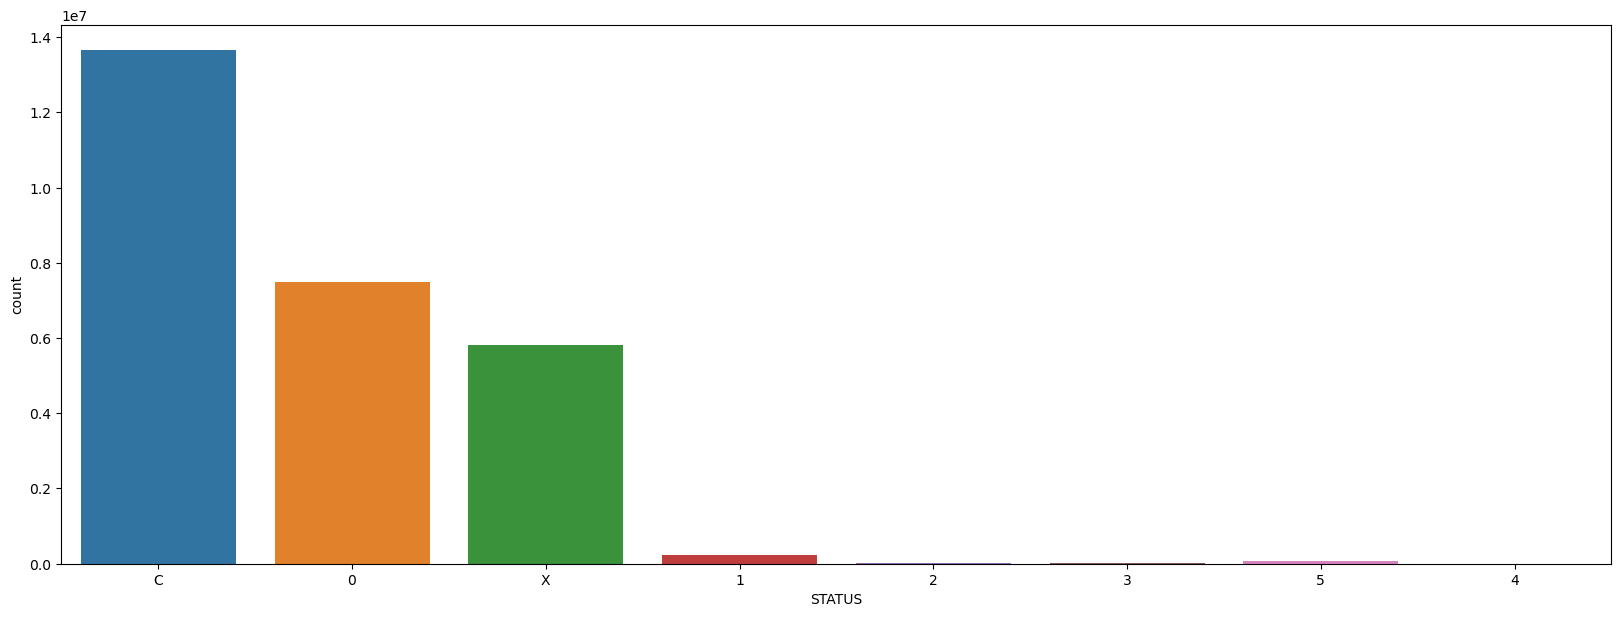

In [89]:
plt.figure(figsize = (20,7))
sns.countplot(x = df3.STATUS)
plt.show()

Mostly the status is "C"

### previous_application - df4

In [90]:
df4 = pd.read_csv("previous_application.csv")
df4.shape

(1670214, 37)

In [91]:
df4.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Replacing empty values into nan
df4.replace('', np.nan, inplace=True)

In [93]:
# Checking for null values
df4.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [94]:
# Checking for null values
df4.dropna(inplace=True)

In [95]:
# Checking for null values atfer dropping null
df4.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
RATE_INTEREST_PRIMARY          0
RATE_INTEREST_PRIVILEGED       0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_CO

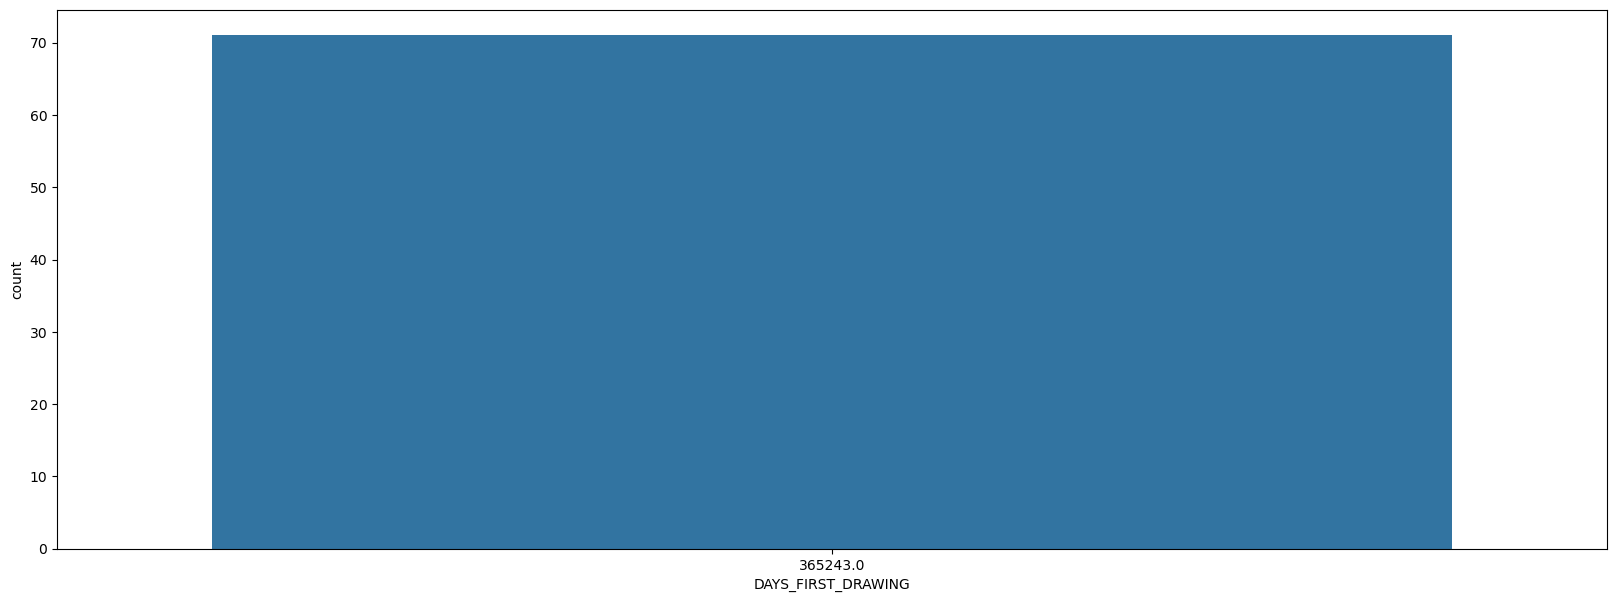

In [96]:
plt.figure(figsize = (20,7))
sns.countplot(x = df4.DAYS_FIRST_DRAWING)
plt.show()

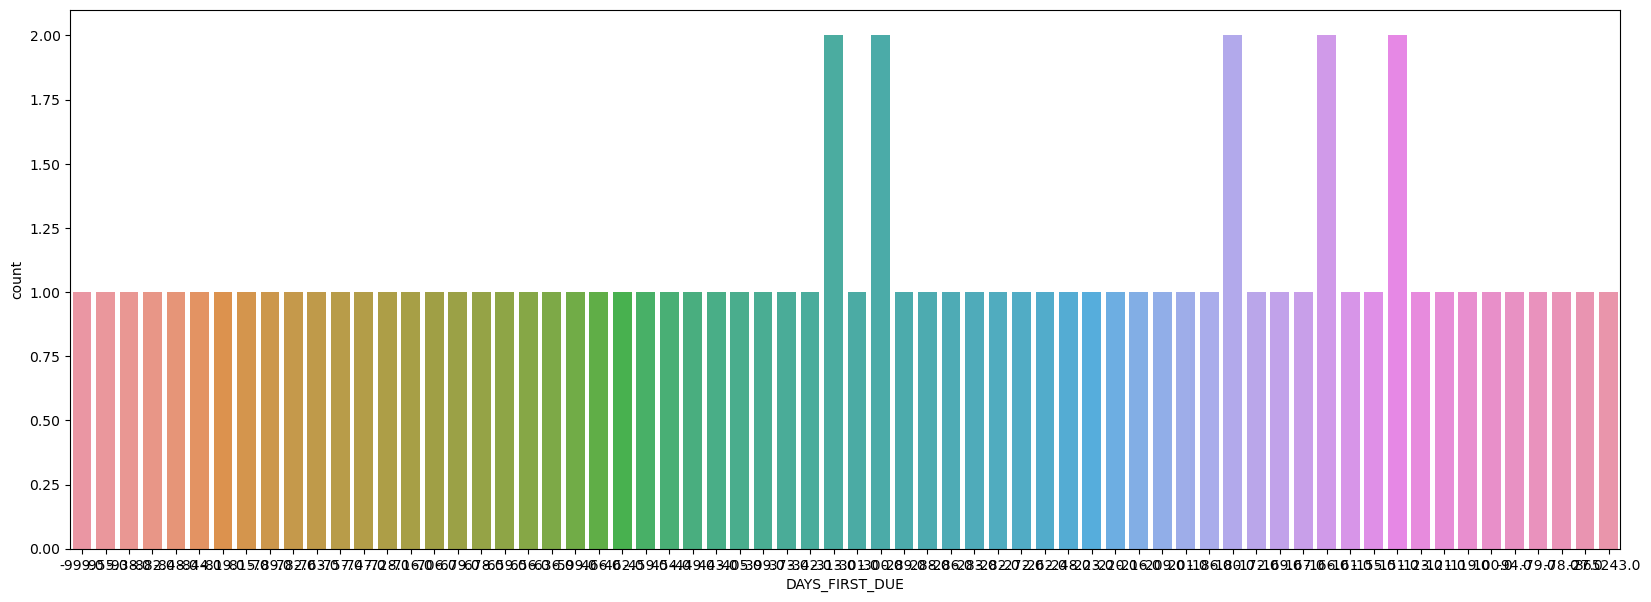

In [97]:
plt.figure(figsize = (20,7))
sns.countplot(x = df4.DAYS_FIRST_DUE)
plt.show()

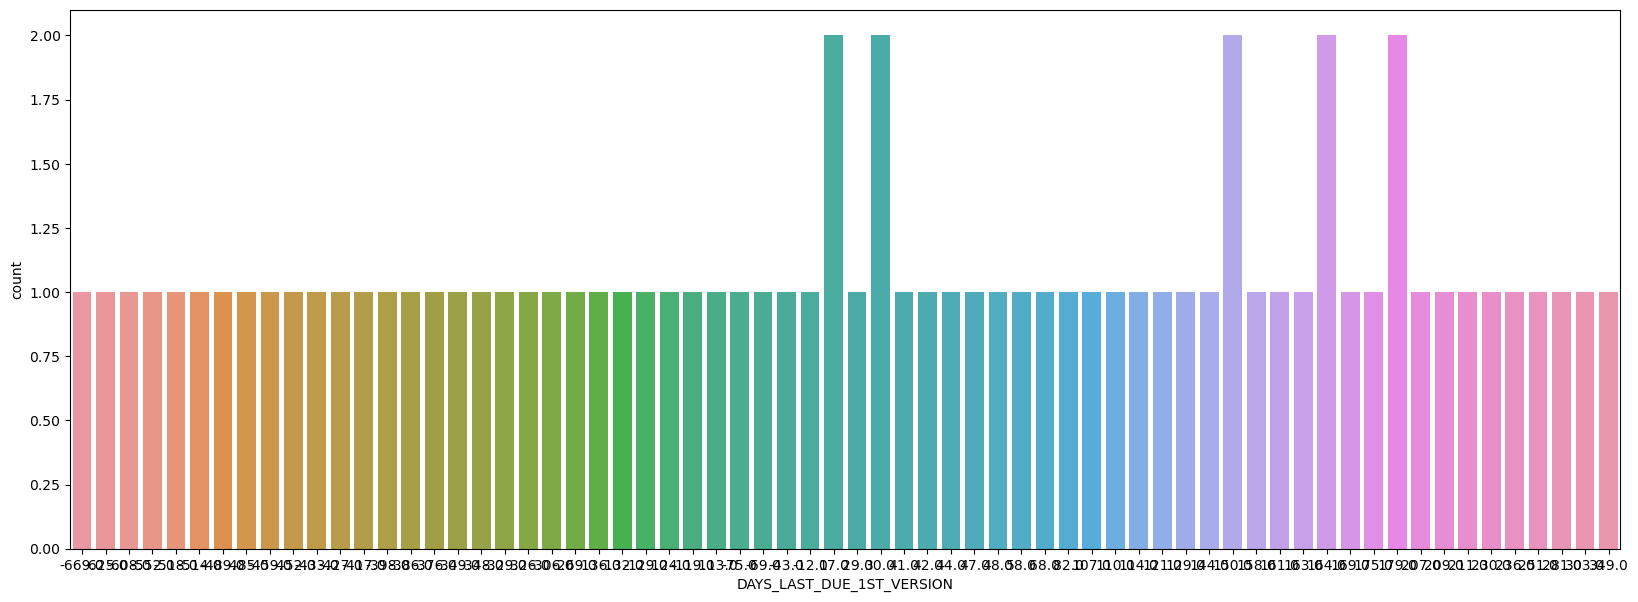

In [98]:
plt.figure(figsize = (20,7))
sns.countplot(x = df4.DAYS_LAST_DUE_1ST_VERSION)
plt.show()

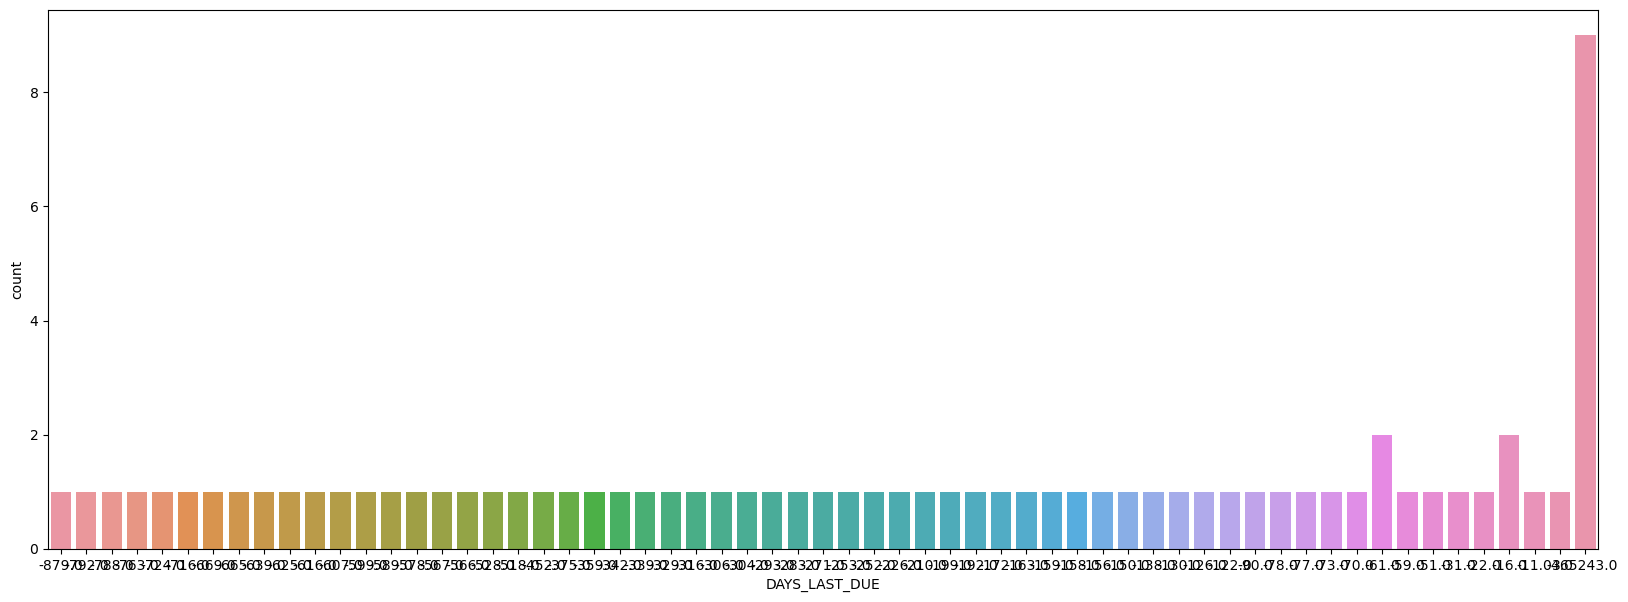

In [99]:
plt.figure(figsize = (20,7))
sns.countplot(x = df4.DAYS_LAST_DUE)
plt.show()

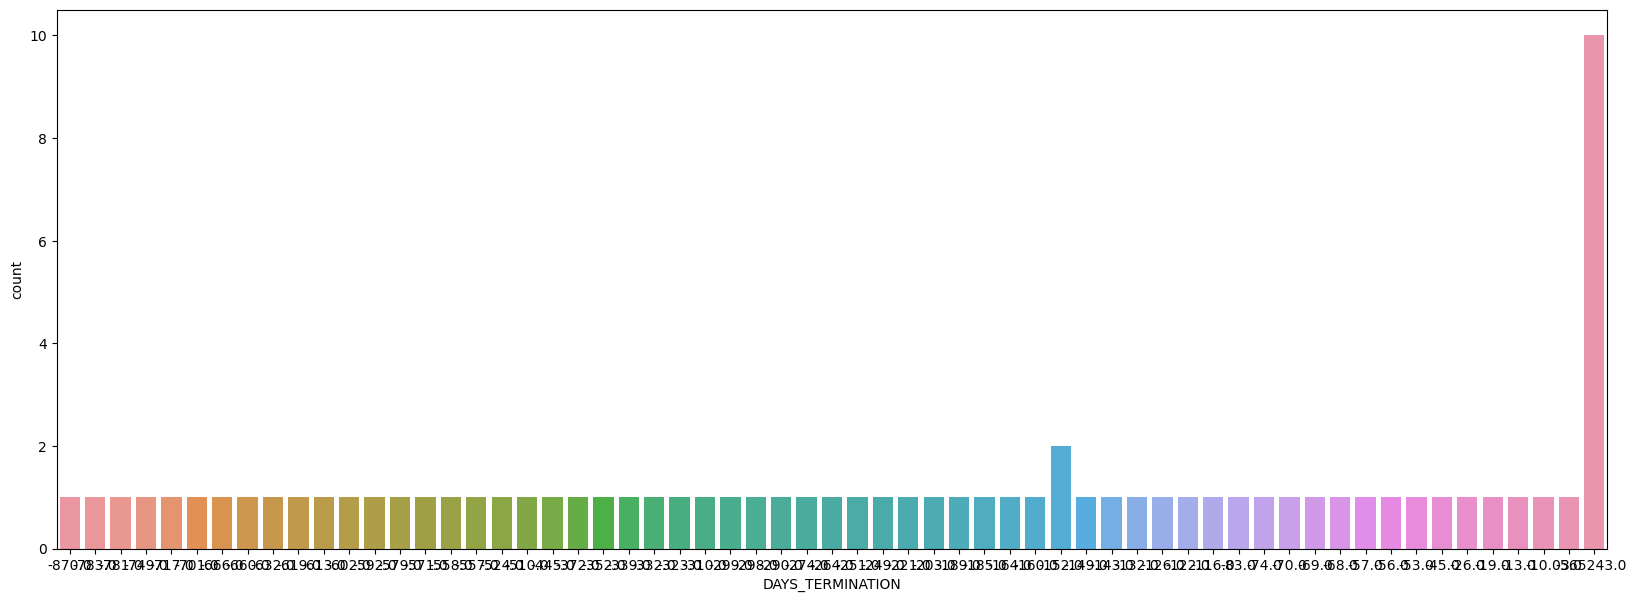

In [100]:
plt.figure(figsize = (20,7))
sns.countplot(x = df4.DAYS_TERMINATION)
plt.show()

In [101]:
# Number of previous applications per customer
grp = df4[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
application_bureau_prev = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev['PREV_APP_COUNT'] = application_bureau_prev['PREV_APP_COUNT'].fillna(0)
# Combining numerical features
grp = df4.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
prev_categorical = pd.get_dummies(df4.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = df4['SK_ID_CURR']
prev_categorical.head()
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

### POS_CASH_balance - df5

In [102]:
df5 = pd.read_csv("POS_CASH_balance.csv")
df5.shape

(10001358, 8)

In [103]:
df5.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [104]:
# Replacing empty values into nan
df5.replace('', np.nan, inplace=True)

In [105]:
# Checking for null values
df5.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [106]:
# Checking for null values
df5.dropna(inplace=True)

In [107]:
# Checking for null values atfer dropping null
df5.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [108]:
# Checking for duplicate values
df5.duplicated().sum()

0

There is no duplicate values

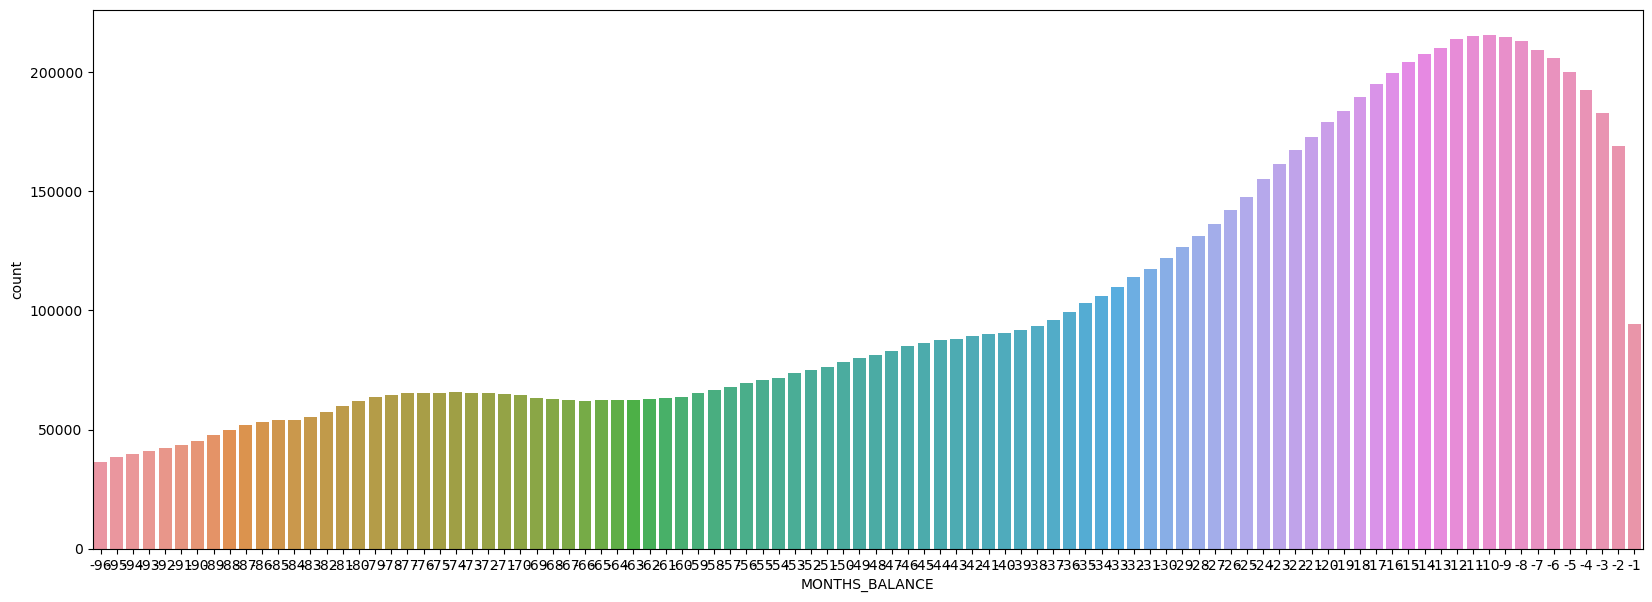

In [109]:
plt.figure(figsize = (20,7))
sns.countplot(x = df5.MONTHS_BALANCE )
plt.show()

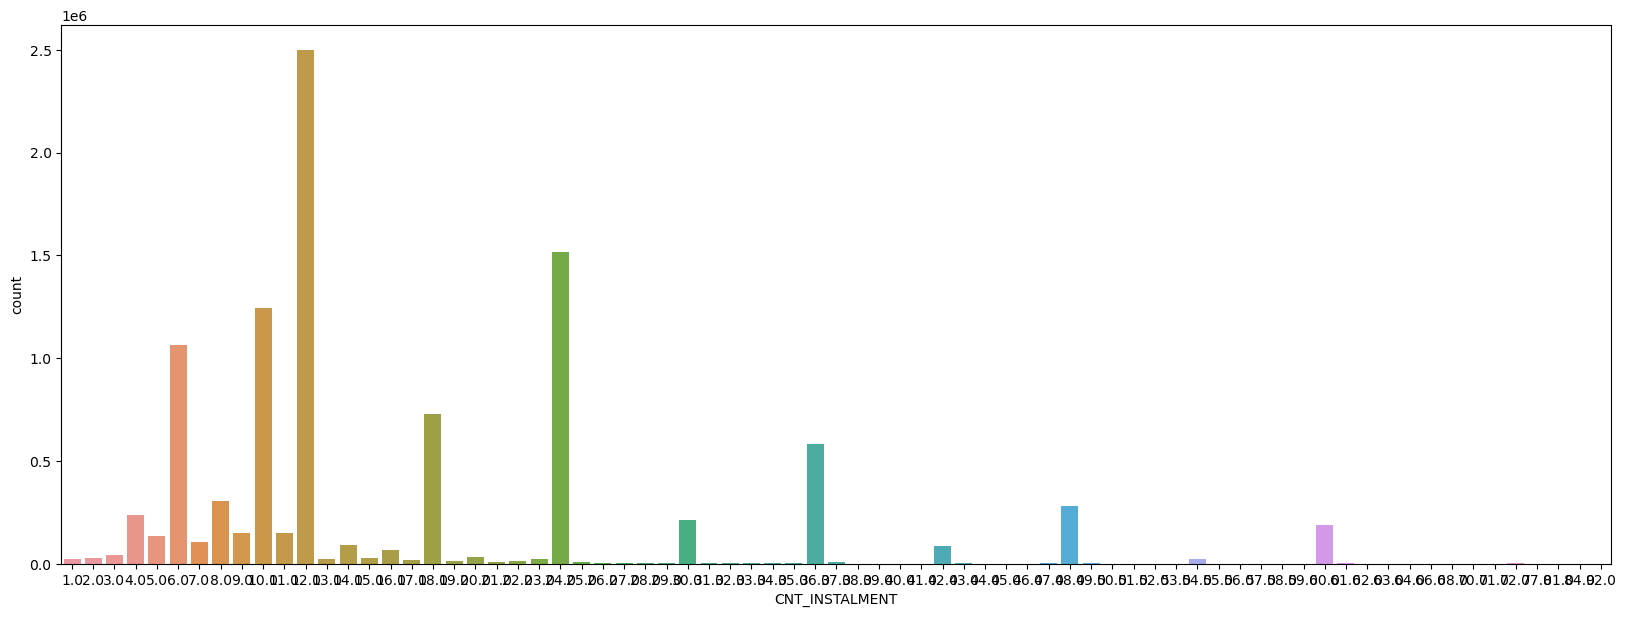

In [110]:
plt.figure(figsize = (20,7))
sns.countplot(x = df5.CNT_INSTALMENT)
plt.show()

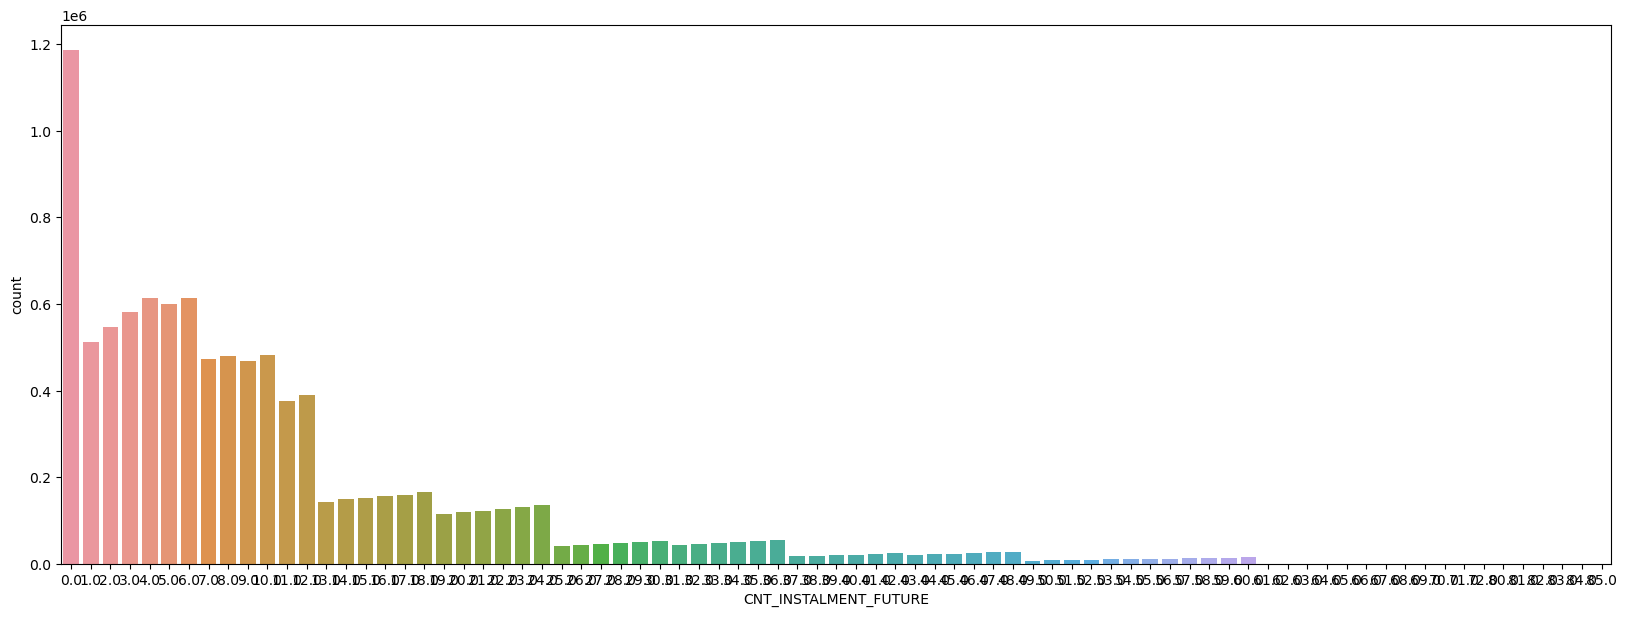

In [111]:
plt.figure(figsize = (20,7))
sns.countplot(x = df5.CNT_INSTALMENT_FUTURE)
plt.show()

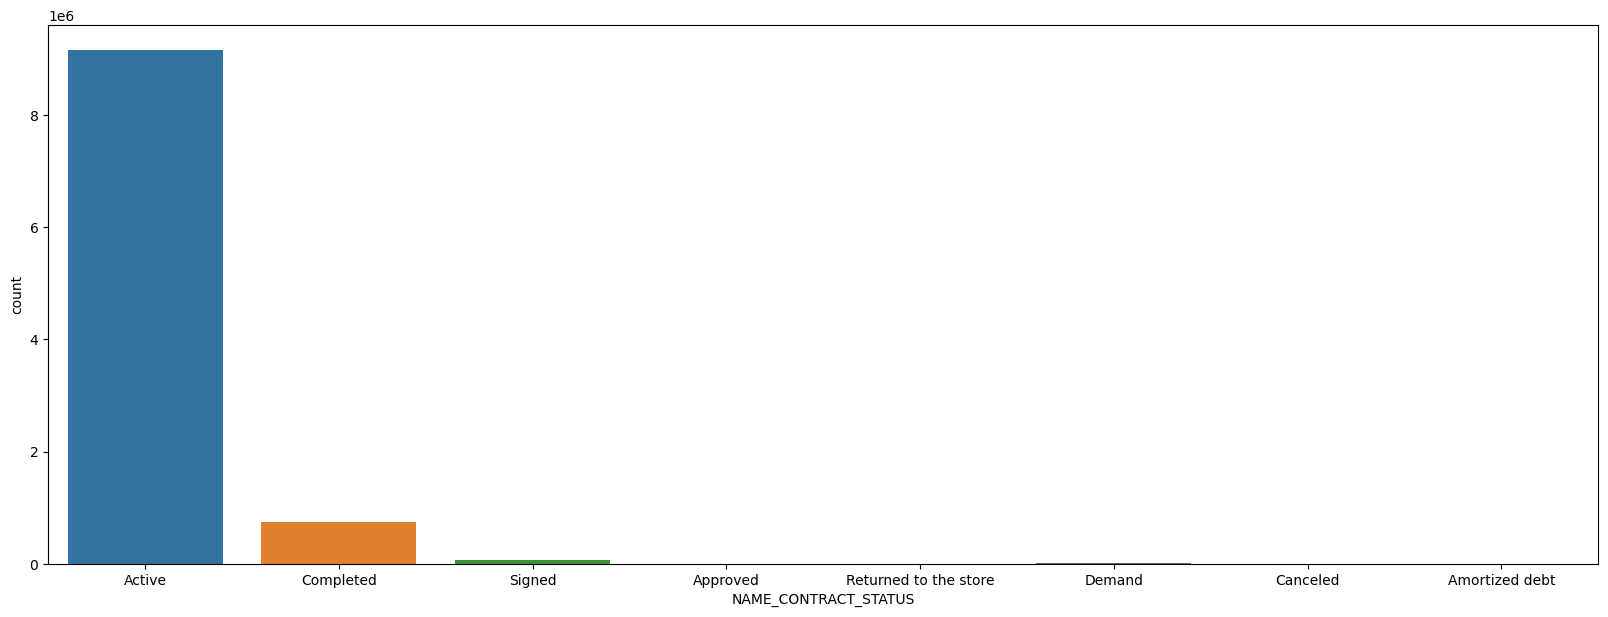

In [112]:
plt.figure(figsize = (20,7))
sns.countplot(x = df5.NAME_CONTRACT_STATUS)
plt.show()

Mostly the name contract status is Active

In [113]:
# Combining numerical features
grp = df5.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
pos_cash_categorical = pd.get_dummies(df5.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = df5['SK_ID_CURR']
grp = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

### installments_payments - df6

In [114]:
df6 = pd.read_csv("installments_payments.csv")
df6.shape

(13605401, 8)

In [115]:
df6.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [116]:
# Replacing empty values into nan
df6.replace('', np.nan, inplace=True)

In [117]:
# Checking for null values
df6.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [118]:
# Checking for null values
df6.dropna(inplace=True)

In [119]:
# Checking for null values atfer dropping null
df6.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [120]:
# Checking for duplicate values
df6.duplicated().sum()

0

There is no duplicate values

In [121]:
df6.shape

(13602496, 8)

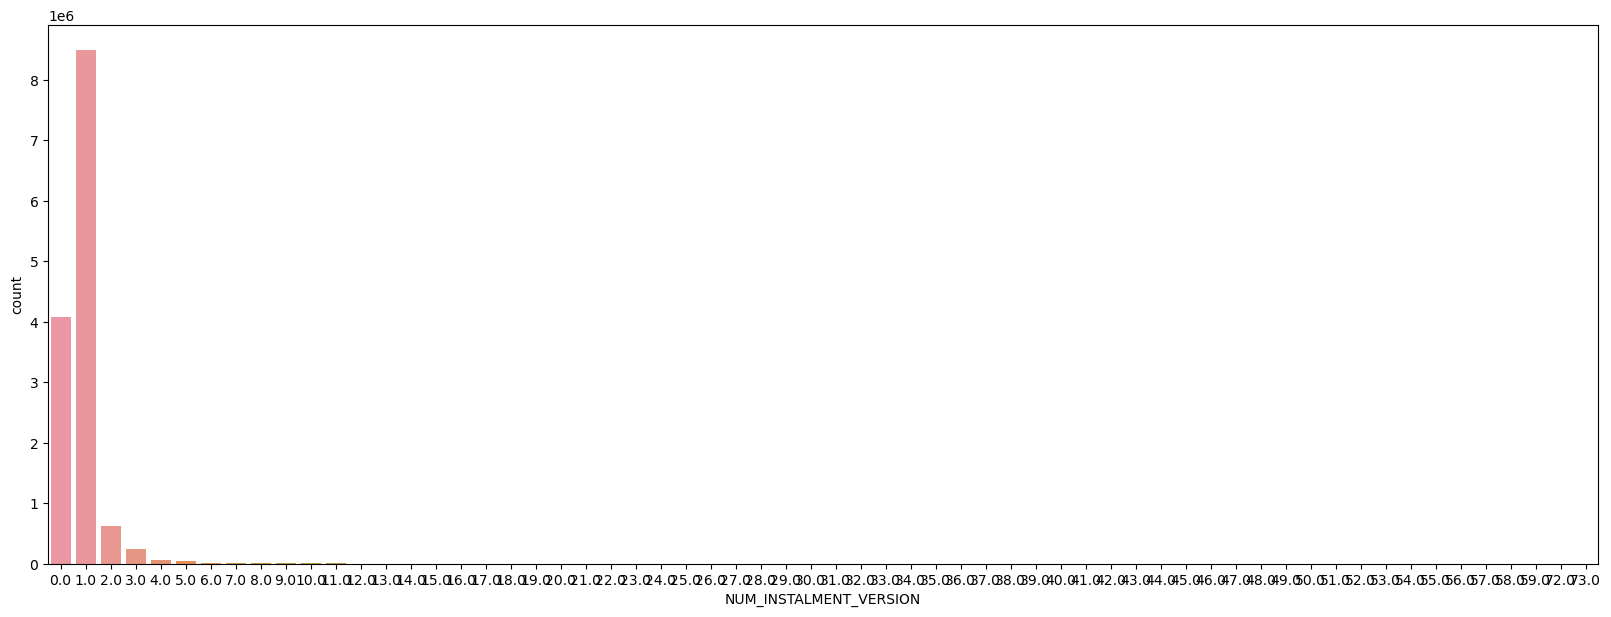

In [122]:
plt.figure(figsize = (20,7))
sns.countplot(x = df6.NUM_INSTALMENT_VERSION )
plt.show()

Mostly the number of instalment version is 1

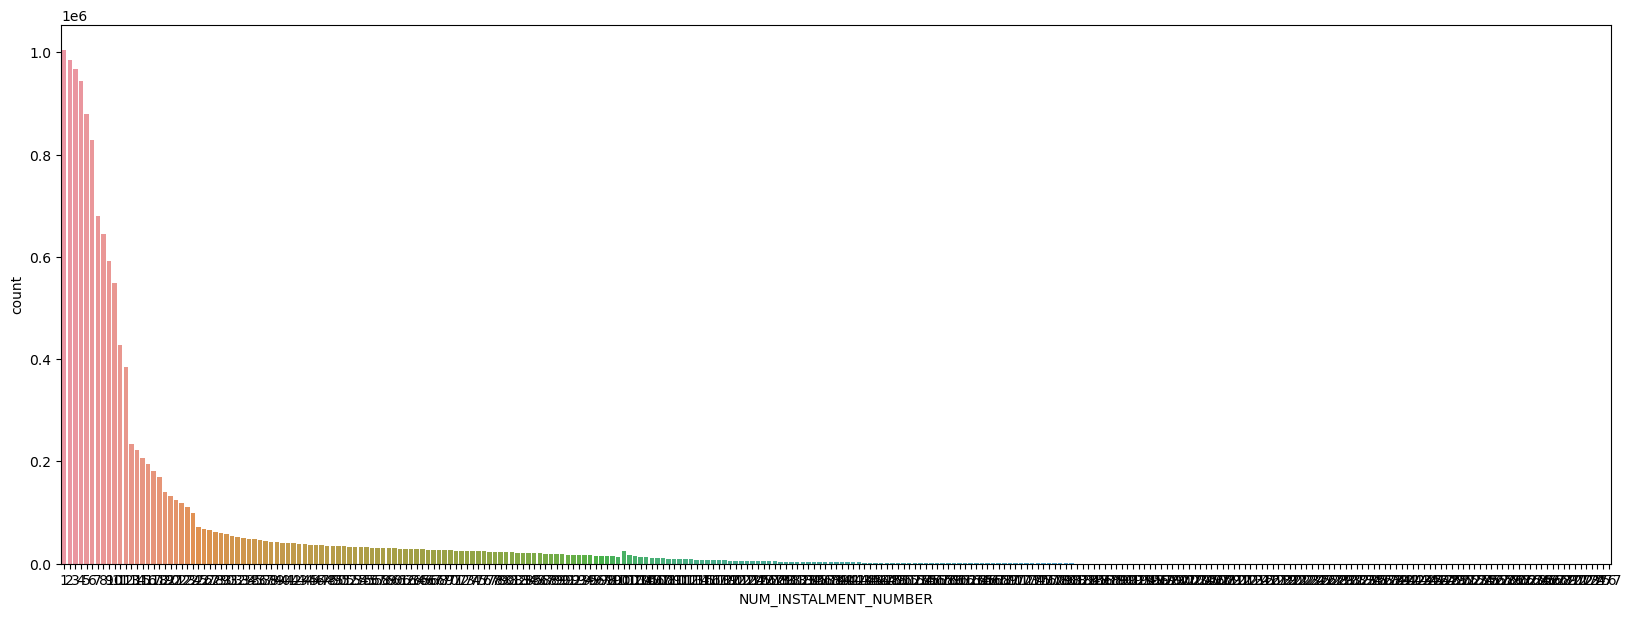

In [123]:
plt.figure(figsize = (20,7))
sns.countplot(x = df6.NUM_INSTALMENT_NUMBER )
plt.show()

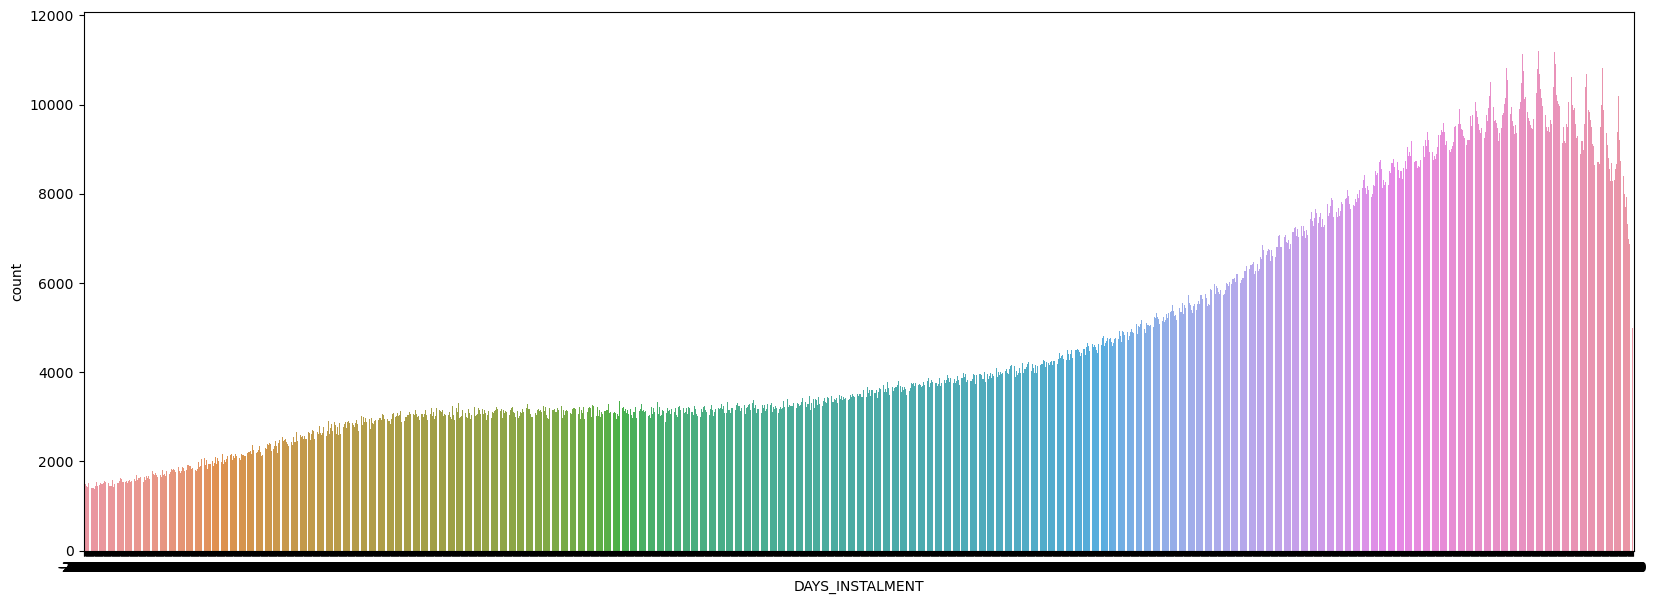

In [124]:
plt.figure(figsize = (20,7))
sns.countplot(x = df6.DAYS_INSTALMENT )
plt.show()

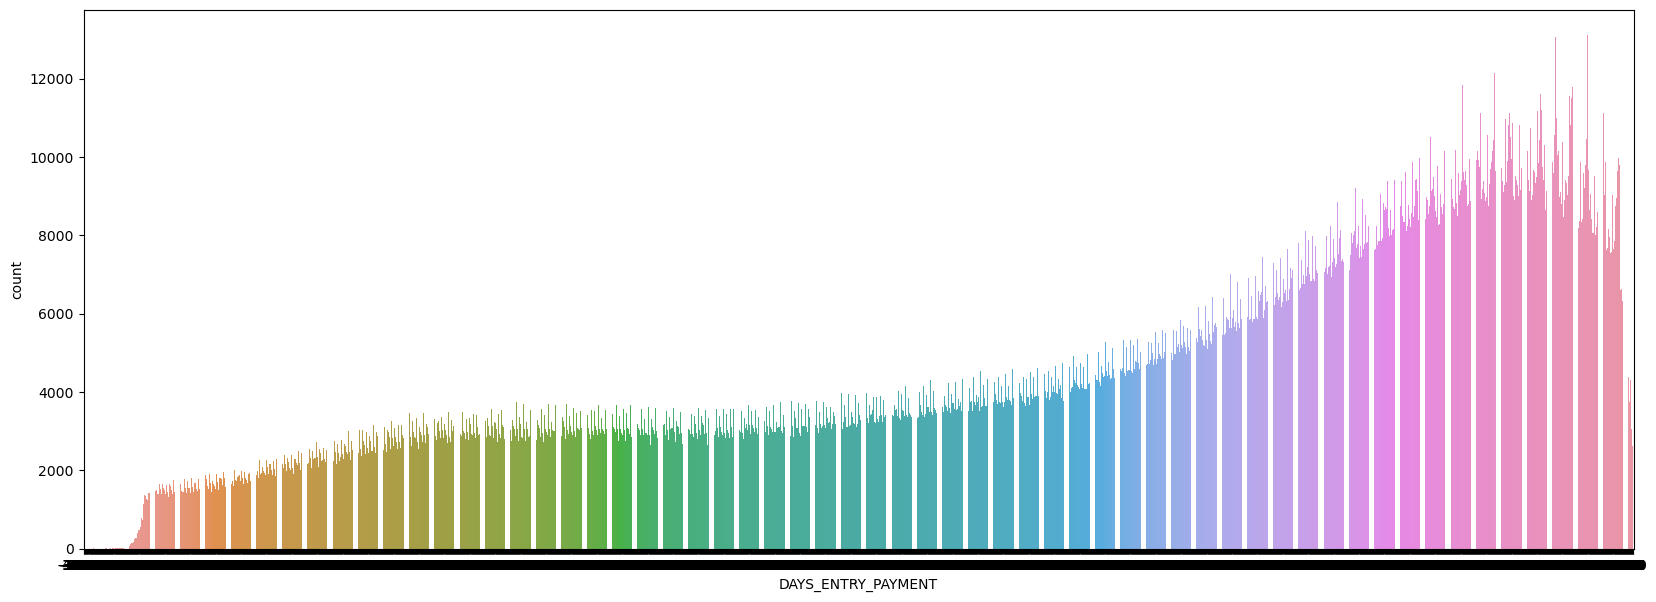

In [125]:
plt.figure(figsize = (20,7))
sns.countplot(x = df6.DAYS_ENTRY_PAYMENT )
plt.show()

In [126]:
grp = df6.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

### credit_card_balance - df7

In [127]:
df7 = pd.read_csv("credit_card_balance.csv")
df7.shape

(3840312, 23)

In [128]:
df7.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [129]:
# Replacing empty values into nan
df7.replace('', np.nan, inplace=True)

In [130]:
# Checking for null values
df7.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [131]:
# Checking for null values
df7.dropna(inplace=True)

In [132]:
# Checking for null values atfer dropping null
df7.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [133]:
# Checking for duplicate values
df7.duplicated().sum()

0

There is no duplicate values

<Axes: ylabel='Density'>

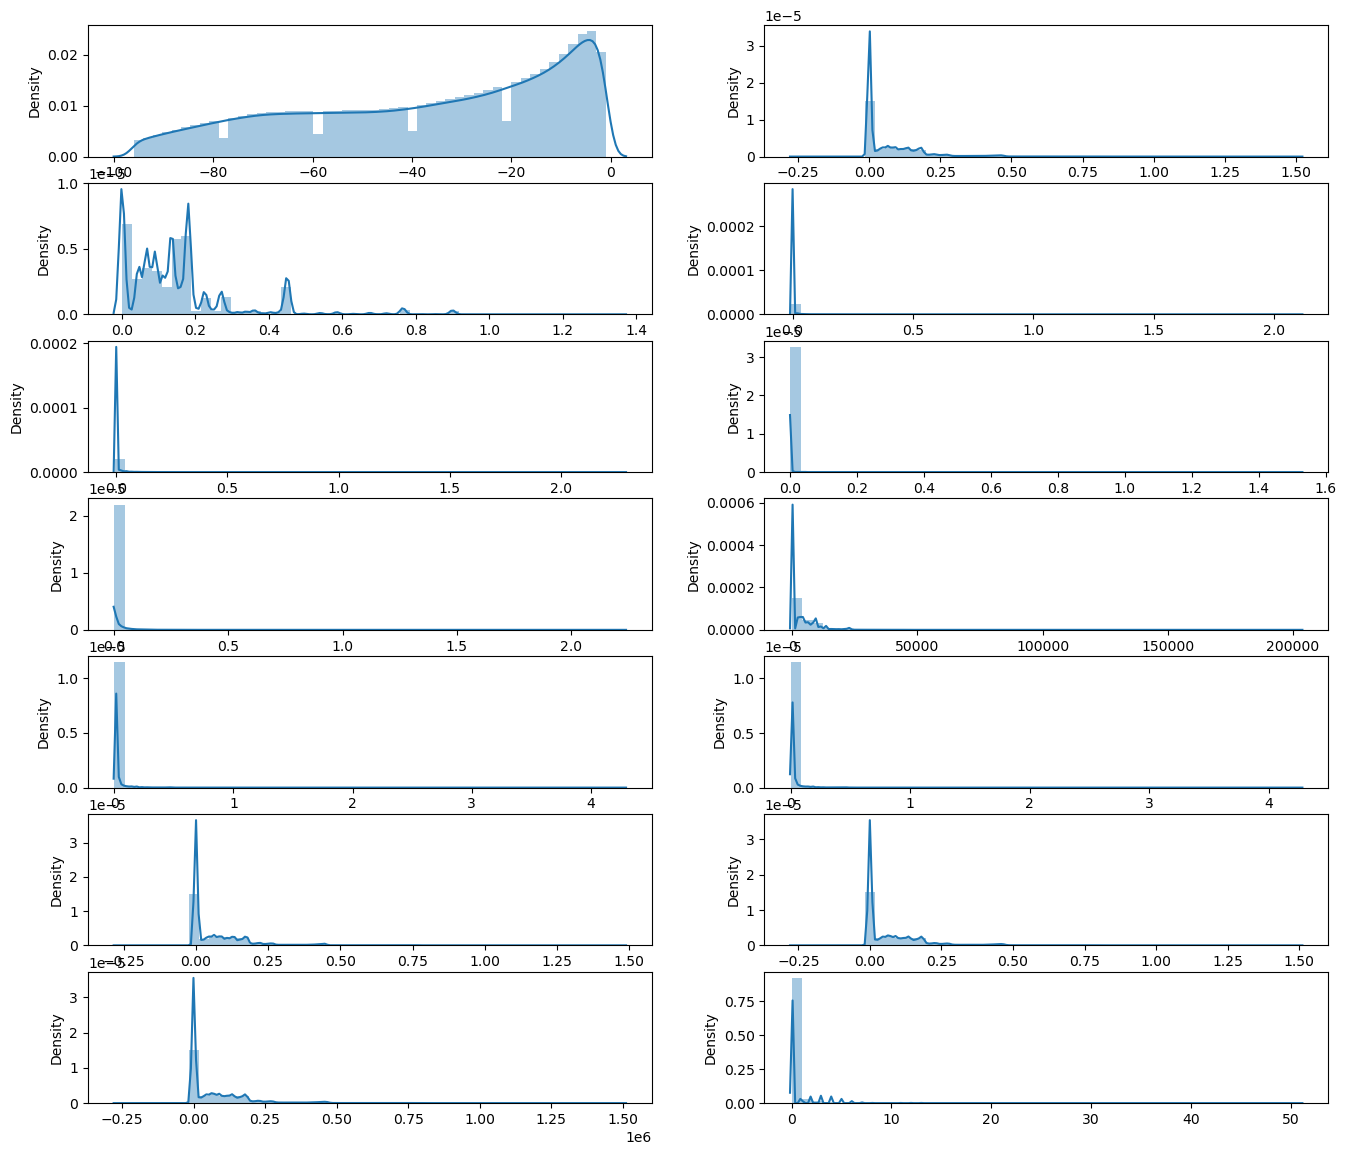

In [134]:
fig , ax  = plt.subplots(nrows=7, ncols=2, figsize  = (16, 14))
sns.distplot(ax=ax[0,0], x=df7.MONTHS_BALANCE)
sns.distplot(ax  = ax[0 , 1] , x=df7.AMT_BALANCE)
sns.distplot(ax  = ax[1 , 0] , x=df7.AMT_CREDIT_LIMIT_ACTUAL)
sns.distplot(ax  = ax[1 , 1] , x=df7.AMT_DRAWINGS_ATM_CURRENT)
sns.distplot(ax  = ax[2 , 0] , x=df7.AMT_DRAWINGS_CURRENT)
sns.distplot(ax  = ax[2 , 1] , x=df7.AMT_DRAWINGS_OTHER_CURRENT)
sns.distplot(ax  = ax[3 , 0] , x=df7.AMT_DRAWINGS_POS_CURRENT)
sns.distplot(ax  = ax[3 , 1] , x=df7.AMT_INST_MIN_REGULARITY)
sns.distplot(ax  = ax[4 , 0] , x=df7.AMT_PAYMENT_CURRENT)
sns.distplot(ax  = ax[4 , 1] , x=df7.AMT_PAYMENT_TOTAL_CURRENT)
sns.distplot(ax  = ax[5 , 0] , x=df7.AMT_RECEIVABLE_PRINCIPAL)
sns.distplot(ax  = ax[5 , 1] , x=df7.AMT_RECIVABLE)
sns.distplot(ax  = ax[6 , 0] , x=df7.AMT_TOTAL_RECEIVABLE)
sns.distplot(ax  = ax[6 , 1] , x=df7.CNT_DRAWINGS_ATM_CURRENT)

Monthly balance ranges from -100 to 0 while others are mostly 0

In [135]:
#Combining numerical features
grp = df7.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
credit_categorical = pd.get_dummies(df7.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = df7['SK_ID_CURR']
grp = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

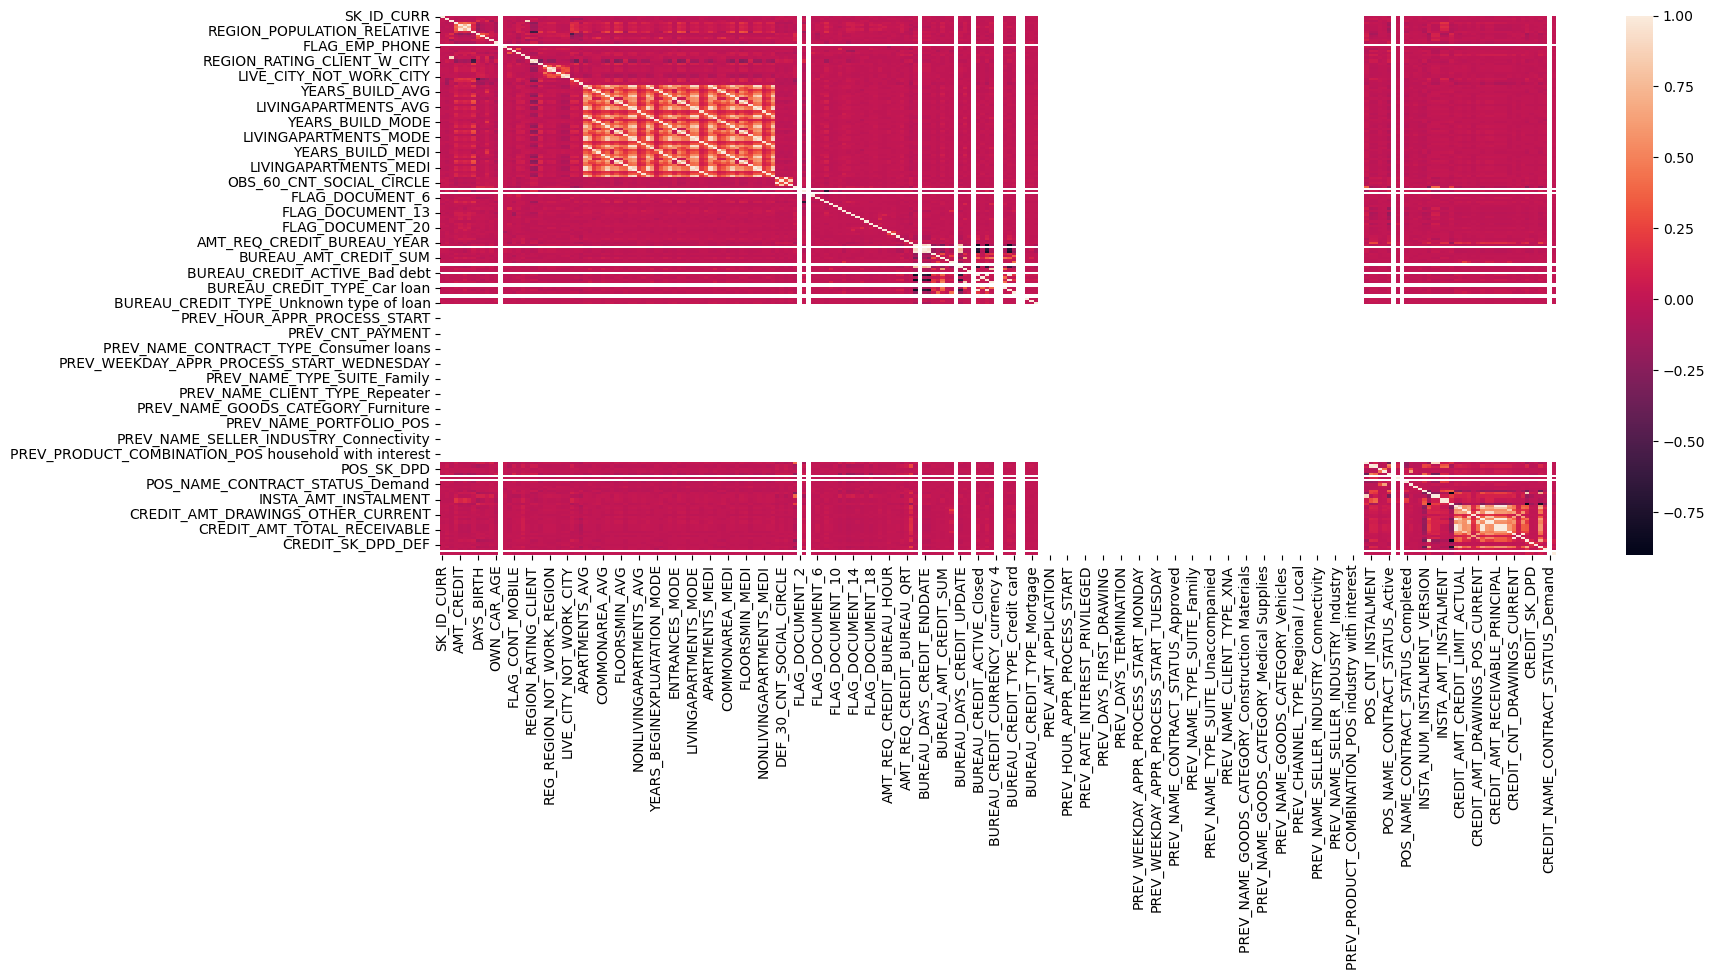

In [136]:
plt.figure(figsize = (18, 7))
sns.heatmap(application_bureau_prev.corr())
plt.show()

In [137]:
data_corr = application_bureau_prev.corr()
table = data_corr['TARGET'].sort_values(ascending=False)
table

TARGET                                               1.000000
DAYS_EMPLOYED                                        0.062950
REGION_RATING_CLIENT_W_CITY                          0.061214
FLAG_DOCUMENT_3                                      0.054269
REGION_RATING_CLIENT                                 0.053614
                                                       ...   
PREV_PRODUCT_COMBINATION_POS mobile with interest         NaN
PREV_PRODUCT_COMBINATION_POS other with interest          NaN
POS_NAME_CONTRACT_STATUS_Amortized debt                   NaN
POS_NAME_CONTRACT_STATUS_Canceled                         NaN
CREDIT_NAME_CONTRACT_STATUS_Demand                        NaN
Name: TARGET, Length: 250, dtype: float64

In [138]:
data = application_bureau_prev.drop(['SK_ID_CURR'],axis=1)

In [139]:
data = data.dropna()

In [140]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_CNT_DRAWINGS_CURRENT,CREDIT_CNT_DRAWINGS_OTHER_CURRENT,CREDIT_CNT_DRAWINGS_POS_CURRENT,CREDIT_CNT_INSTALMENT_MATURE_CUM,CREDIT_SK_DPD,CREDIT_SK_DPD_DEF,CREDIT_NAME_CONTRACT_STATUS_Active,CREDIT_NAME_CONTRACT_STATUS_Completed,CREDIT_NAME_CONTRACT_STATUS_Demand,CREDIT_NAME_CONTRACT_STATUS_Signed
0,False,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,False,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,...,0.0,0.0,0.0,21.78125,0.0,0.0,1.0,0.0,0.0,0.0
2,False,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,False,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,True,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Giving labelfor catogorical columns
label_encoder = preprocessing.LabelEncoder()
data['NAME_INCOME_TYPE']= label_encoder.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS']= label_encoder.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE']= label_encoder.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE']= label_encoder.fit_transform(data['OCCUPATION_TYPE'])
data['WEEKDAY_APPR_PROCESS_START']= label_encoder.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE']= label_encoder.fit_transform(data['ORGANIZATION_TYPE'])
data['FONDKAPREMONT_MODE']= label_encoder.fit_transform(data['FONDKAPREMONT_MODE'])
data['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER']= label_encoder.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR']= label_encoder.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY']= label_encoder.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE']= label_encoder.fit_transform(data['NAME_TYPE_SUITE'])
data['HOUSETYPE_MODE']= label_encoder.fit_transform(data['HOUSETYPE_MODE'])
data['WALLSMATERIAL_MODE']= label_encoder.fit_transform(data['WALLSMATERIAL_MODE'])
data['EMERGENCYSTATE_MODE']= label_encoder.fit_transform(data['EMERGENCYSTATE_MODE'])

In [142]:
X = data.iloc[:,1:]
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,CREDIT_CNT_DRAWINGS_CURRENT,CREDIT_CNT_DRAWINGS_OTHER_CURRENT,CREDIT_CNT_DRAWINGS_POS_CURRENT,CREDIT_CNT_INSTALMENT_MATURE_CUM,CREDIT_SK_DPD,CREDIT_SK_DPD_DEF,CREDIT_NAME_CONTRACT_STATUS_Active,CREDIT_NAME_CONTRACT_STATUS_Completed,CREDIT_NAME_CONTRACT_STATUS_Demand,CREDIT_NAME_CONTRACT_STATUS_Signed
0,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,6,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,1,...,0.0,0.0,0.0,21.78125,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,6,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,6,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,6,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
y = data.TARGET

In [144]:
y.head()

0    False
1    False
2    False
3    False
4     True
Name: TARGET, dtype: bool

In [145]:
cat_col = data.select_dtypes (include= ['object'])

In [146]:
cat_col.columns

Index([], dtype='object')

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (6021, 264)
Shape of X_test: (2581, 264)


## Logistic Regression

In [148]:
# Fine tuning the parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=20)
reg_model = LogisticRegression()
parameters = {'solver':['liblinear', 'lbfgs', 'sag'],
             'C':[100,150,125]}

grid_model = GridSearchCV(reg_model, parameters, cv=5, scoring='accuracy', error_score=0)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 125],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [149]:
grid_model.best_params_

{'C': 100, 'solver': 'lbfgs'}

In [150]:
# Logistic Regression modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
reg_model = LogisticRegression(solver='sag' ,C=100)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Random Forest Classifier

In [151]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
rfc_model = RandomForestClassifier(n_estimators=50)
parameters = {"max_depth": [3, None],
              "max_features": [1,6,9,12],
              "criterion": ["gini","log_loss"]}

rscv_model = RandomizedSearchCV (rfc_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'criterion': ['gini', 'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 6, 9, 12]})

In [152]:
rscv_model.best_params_

{'max_features': 6, 'max_depth': 3, 'criterion': 'gini'}

In [153]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, random_state=20)

# Modle Training and evaluation
rfc_model = RandomForestClassifier(max_features=6,max_depth= None,criterion='log_loss')
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[15]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Decision Tree Classifier

In [154]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
dtc_model = DecisionTreeClassifier()
parameters = {'max_depth':[10,None],
             'criterion': ['gini','entropy']}

rscv_model = RandomizedSearchCV (dtc_model, param_distributions=parameters,cv=5)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, None]})

In [155]:
rscv_model.best_params_

{'max_depth': 10, 'criterion': 'gini'}

In [164]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=15)

# Modle Training and evaluation
dtc_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## KNN

In [157]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
knn_model = KNeighborsClassifier()
parameters = {"n_neighbors": [3, 5, 7],
              "weights": ['uniform', 'distance'],
              "algorithm": ['auto','ball_tree','kd_tree','brute']}
rscv_model = RandomizedSearchCV (knn_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7],
                                        'weights': ['uniform', 'distance']})

In [158]:
rscv_model.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'auto'}

In [159]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)

# Modle Training and evaluation
knn_model = KNeighborsClassifier(n_neighbors=7,algorithm = 'kd_tree', weights = 'distance')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## XGB Classifier

In [160]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
xgb_model = xgb.XGBClassifier()
parameters = {"max_depth": [3, 6, 10],
              "min_child_weight": [1,6,9,12],
              "gamma": [0,1]}

rscv_model = RandomizedSearchCV (xgb_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'gamma': [0, 1],
                                        'max_depth': [3, 6, 10],
                                        'min_child_weight': [1, 6, 9, 12]})

In [161]:
rscv_model.best_params_

{'min_child_weight': 1, 'max_depth': 10, 'gamma': 1}

In [162]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, random_state=20)

# Modle Training and evaluation
xgb_model = xgb.XGBClassifier(max_depth = 10, gamma = 1, min_child_weight = 1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  1.0
[[15]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# Final Report
## Introduction
    Home Credit, like any other financial institution, manages the risk of loan defaults by implementing various risk management strategies.
    
## Objective

    To develop a machine learning model that can accurately classify whether the loans will be repayed or not 

## Steps Followed

1) Define the problem

2) Gather data

3) Preprocess the data

4) Feature engineering

5) Choose a machine learning algorithm

6) Training, Tuning and evaluating the model

## Dataset

1) The dataframe application_train contains the loan and loan applicants.

2) The dataframe bureau contains the application data from other loans that the client took from other credit institutions and were reported to the credit bureau.

3) The dataframe previous_applications contains information about previous loans at Home Credit by the same client, previous loans information and client information at the time of the loan (there is a line in the dataframe per previous loan application).

4) SK_ID_CURR is connecting the dataframes application_train|test with bureau, previous_application and also with dataframes

5) POS_CASH_balance, installments_payment and credit_card_balance

6) SK_ID_PREV connects dataframe previous_application with POS_CASH_balance, installments_payment and credit_card_balance 

7) SK_ID_BUREAU connects dataframe bureau with dataframe bureau_balance

8) There are 7 files totally 206 unique columns including the target variable
    
## Data Preparation

1) Merging all the files together

2) Removed null values

3) Removed the extra values

## Exploratory Data Analysis

1)  93.9% of total loans are not getting repayed

2) Loan given in cash form are not getting repayed

3) Married people are not repaying the loan

4) People without children are not repaying the loan

5) People with family members of 2 are not repaying the loan

6) Working people are not mostly repaying the loan

7) People with Secondary / Higher education are not repaying the loan

8) People who are mostly working as Labours are not repaying the loan

9) Business Entity type 3 job people are not repaying the loan

10) People who lives in house and apartment are not repaying the loan

11) People who have consumer credit card are not repaying the loan

## Model Training and Evaluation

We have tried with different models such as:

    1) Linear Regression (Accuracy – 100%)
    
    2) Random Forest Regression (Accuracy - 100%)
    
    3) Decision Tree Classifier (Accuracy - 100%)
    
    4) KNN (Accuracy - 100%)
    
    5) XG Boost Regression (Accuracy - 100%)
    
## All the models have 100% Accuracy

##### Performed Feature selection and Hyperparamater tuning for Linear Regression, Random Forest Regression ,Decision Tree Classifier, KNN, XG Boost Regression which increased the model's accuracy.


## Limitations

1) The Data was very huge it tooklong time to run each code

2) The system we are working on does have the capacity to run other models like Neural Network.

## Future Work

1) As Future work we can Development of more accurate and effective models, Integration of alternative data sources, Exploration of new lending models and Analysis of macroeconomic trends.

## Conclusion

1) Home Credit Default Risk is an important consideration for financial institutions, investors, and regulators alike. The likelihood of a borrower defaulting on a home loan or mortgage can have significant financial and systemic implications, and as such, it is important to manage and mitigate this risk.

## Business Analysis

1) Target audience: The target audience for Home Credit Default Risk is primarily financial institutions, such as banks, credit unions, and mortgage lenders, who provide home loans and mortgages to borrowers. These institutions are interested in managing their exposure to credit risk and avoiding potential losses from borrower defaults.

2) Market demand: the market demand for Home Credit Default Risk is closely tied to the broader economic and financial environment and is subject to fluctuations based on the state of the economy, interest rates, and consumer confidence.

3) Data availability: The availability and quality of data is a key factor in developing an accurate prediction model. There is a wide range of data available for Home Credit Default Risk analysis, which can be used to develop predictive models and other risk management tools.

4) Legal and ethical considerations: To approach Home Credit Default Risk with a focus on fairness, transparency, and responsible lending practices, while also complying with applicable legal and regulatory requirements.

5) Competitive landscape: The competitive landscape for Home Credit Default Risk is diverse, with a range of players offering a variety of products and services to meet the needs of financial institutions and investors looking to manage their exposure to credit risk.